# Proyecto Final
# Telecomunicaciones ☎️: identificar operadores ineficaces 

Enlace a presentación en drive: https://drive.google.com/file/d/1vHRzz7R8vmXI8F5noh-IY05urNhD8Tna/view?usp=sharing

## Introducción 


Para este proyecto se trabajará en la empresa de telefonía virtual CallMeMaybe.
Los clientes de la empresa son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. 
Para temas de comunicación interna, los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red interna. 
La empresa tiene interesen implementar un sistema que permita al área de supervisión identificar a los operadores menos eficaces. Para este caso, se plantea realizar un análisis de datos para identificar patrones y tendencias para facilitar la identificación de dichos operadores. 
Siendo que se usarán dos datasets, los cuales contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. 

El primer dataset (`telecom_dataset_us.csv`) contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

El segundo dataset (`telecom_clients_us.csv`) contiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

Se realizará un análisis exploratorio de datos que permita identificar tendencias y realizar hipótesis que logren facilitar la función para los supervisores identificando más rápido a dichos operadores ineficaces.

## Objetivos 


El objetivo del proyecto es la identificaicón de patrones para operadores más ineficaces, ya que así podemos saber más fácilmente que estrategias deben implementarse para mejorar el rendimiento, ya que sería inadecuado solo reemplazar operadores con mayor cantidad de llamadas al final de cierto periodo pues se estaría incurriendo en una rotación alta de personal, lo cual implicaría un impacto negativo en la empresa, tal como menciona Roberto Mendoza en su artículo para REVISTA ESCUELA DE ADMINISTRACIÓN DE NEGOCIOS:  

    "...un alto nivel de
    rotación de personal puede significar poner
    en peligro el aseguramiento de la calidad y
    servicio al cliente, lo mismo que la innovación
    y un bajo costo de entrega al cliente" 
    (Mendoza, 20003)
    
Dicho esto si logramos obtener tendencias de comportamiento, permitiremos a los supervisores tomar acciones preventivas para uan vez identificados dichos operadores, se les pueda dar seguimiento y analizar otros factores que permitan dar con las causas del bajo rendimiento. 

Así pues las decisiones clave a tomar en el proyecto serán identificar que factores influyen en el rendimiento bajo de los operadores, es decir si existe relación entre la inefectividad como clientes, y fechas de llamadas. 
Se interesa saber además si los operadores ineficaces obedecen a estas variables como horarios de las llamadas o atención a ciertos clientes, o bien son un grupo aislado de operadores que no siguen un patrón específico.

## Stakeholders 


Para la identificación de los interesados se utilza el Modelo de Poder e Interés de Gardner, citado por Acuña (2012). 
Donde se clasifican de acuerdo al nivel de poder dentro de la toma de decisiones y el interés en el proyecto:

Si bien se tienen cuatro clasificacioens para efectos de mayor simplicidad se tomarán solo dos interesados, aquellos con poder de toma de decisiones ya sea que tengan interés directo o interés indirecto, siendo que los primeros (con poder de decisión realtivamente bajo en la organzación pero muy interesados en el proyecto) son los que deben tener un amyor grado de satisfacción, en este caso serían los supervisores. 

Para el segundo caso, tendríamos la gerencia los cuales tienen el poder de decisión en la empresa pero su interés es realtivamente bajo o en otras palabras, más indirecto comparado a los supervisores, por lo que a este grupo solo se debe mantener informado, sin presentar detalles adicionales. 

Los interesados directos en este análisis son el área de supervisión, y en menor medida tal vez el área de gerencia, por lo que se debe considerar generar un informe acorde a estos interesados, para este caso se plantea generar una presentación ejecutiva que permita comunicar información descubierta de la manera más concisa posible, sin adentrarse en detalles técnicos sobre las técnicas de análsis o código, si no más bien en los resultados y hallazgos obtenidos, así como algunas recomendaciones. 

## Preprocesamiento de datos y limpieza de datos

### Importación de librerias requeridas y lectura de los datos

In [1]:
#Importar librerias para EDA
import pandas as pd
import numpy as np
#Importar librerias de visualización
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#Importar librerias de análisis estadístico
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
#Importar librerias para Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
#Leer datasets. se toman datos directo del sitio de Notion , con un try except en caso de no lograr leerse desde plataforma 
try:
    calls = pd.read_csv('C:/Users/USUARIO/Desktop/proyecto_final/telecom_dataset_us.csv')
    clients = pd.read_csv('C:/Users/USUARIO/Desktop/proyecto_final/telecom_clients_us.csv')
except:
    calls = pd.read_csv('/datasets/telecom_dataset_us.csv')
    clients = pd.read_csv('/datasets/telecom_clients_us.csv')

### Revisar información general mediante el método info()

In [3]:
calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 11.2 MB


In [4]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [5]:
calls.sample(30)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
6227,166541,2019-09-30 00:00:00+03:00,in,False,NaN,True,5,0,113
14493,166837,2019-10-15 00:00:00+03:00,in,False,NaN,True,5,0,46
23499,167082,2019-10-30 00:00:00+03:00,out,False,900788.0,False,1,124,134
36632,167626,2019-09-30 00:00:00+03:00,out,False,919314.0,False,116,4902,6880
46995,168154,2019-11-23 00:00:00+03:00,out,False,NaN,True,1,0,0
24660,167112,2019-10-07 00:00:00+03:00,out,False,904014.0,True,1,0,7
33676,167497,2019-10-23 00:00:00+03:00,out,True,924934.0,True,1,0,44
52064,168361,2019-10-28 00:00:00+03:00,out,False,945290.0,True,43,0,1557
8446,166658,2019-09-13 00:00:00+03:00,out,False,891154.0,True,5,0,44
15805,166901,2019-10-14 00:00:00+03:00,out,False,896016.0,False,2,175,194


In [6]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 95.2 KB


In [7]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


#### Hallazgos sobre exploración inicial 
Observamos valores nulos en operator_id e internal en el df calls. 

Así mismo se recomienda cambiar la columna date a tipo datetime, la columna direction a tipo category, internal a bool y operator_id a int.

No observamso valores nulosen el df clientes, pero se recomienda cambiar la columna tariff_plan	a category y date_start a datetime

### Cambio de tipo de datos

In [8]:
#Cambiamos valores nulos en coumna opertro_id por 0 
calls['operator_id'] = calls['operator_id'].fillna(0)

In [9]:
#Cambiar tipos de columnas en datasets
calls['date'] = pd.to_datetime(calls['date']).dt.tz_localize(None)
calls['direction'] = calls['direction'].astype('category')
calls['operator_id'] = calls['operator_id'].astype(int)
clients['tariff_plan'] = clients['tariff_plan'].astype('category')
clients['date_start'] = pd.to_datetime(clients['date_start'])

In [10]:
calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  category      
 3   internal             53785 non-null  object        
 4   operator_id          53902 non-null  int32         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 4.2 MB


In [11]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    category      
 2   date_start   732 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 12.6 KB


### Análisis de valores nulos 

Analizamos los valores nulos en al columan internal para revisar valores nulos y examinar si se cambian o eliminan ya que la eliminación no tendría un impacto significativo en los datos

In [12]:
calls.isna().sum()

user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

In [13]:
#Creamos un series para revisar que valores son nulos
a = calls.isnull().any(axis=1)
#Apicamosn función lambda para filtrar datos donde NaN sea True
filter_cond = a.apply(lambda x:x==True)
#Mostramos resultado 
data_filtered = a[filter_cond]
print(data_filtered)


1007     True
1090     True
1864     True
1924     True
6210     True
         ... 
52462    True
52590    True
52621    True
53717    True
53799    True
Length: 117, dtype: bool


In [14]:
#Revisamos como es el valor ausente para saber si puede ser reemplazado o convien eliminar los valores
print(calls.iloc[1007]) 
print('*'*50)
print(calls.iloc[1090]) 
print('*'*50)


user_id                             166405
date                   2019-09-18 00:00:00
direction                               in
internal                               NaN
operator_id                              0
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                     59
Name: 1007, dtype: object
**************************************************
user_id                             166405
date                   2019-10-01 00:00:00
direction                               in
internal                               NaN
operator_id                              0
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                      1
Name: 1090, dtype: object
**************************************************


In [15]:
print(calls.iloc[1864]) 
print('*'*50)
print(calls.iloc[1924]) 

user_id                             166406
date                   2019-08-20 00:00:00
direction                               in
internal                               NaN
operator_id                              0
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                     36
Name: 1864, dtype: object
**************************************************
user_id                             166406
date                   2019-09-02 00:00:00
direction                               in
internal                               NaN
operator_id                         879898
is_missed_call                       False
calls_count                              1
call_duration                            2
total_call_duration                      9
Name: 1924, dtype: object


In [16]:
print(calls.iloc[52621]) 
print('*'*50)
print(calls.iloc[52462]) 
print('*'*50)

user_id                             168361
date                   2019-11-14 00:00:00
direction                               in
internal                               NaN
operator_id                              0
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                      2
Name: 52621, dtype: object
**************************************************
user_id                             168361
date                   2019-11-09 00:00:00
direction                               in
internal                               NaN
operator_id                              0
is_missed_call                        True
calls_count                              6
call_duration                            0
total_call_duration                     14
Name: 52462, dtype: object
**************************************************


Observamos que no hay un patrón en los datos ausentes, por lo que no tenemos suficiente información para poder obtener una valor de reeempazo satisfactrio por lo que se eliminan los datos duplicados

In [17]:
#Eliminar valores ausentes del df calls
calls = calls.dropna()

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  category      
 3   internal             53785 non-null  object        
 4   operator_id          53785 non-null  int32         
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 3.2+ MB


In [19]:
#Cambiar valores de internal a tipo bool
calls['internal'] = calls['internal'].astype('bool')

In [20]:
#Verificamos cambios 
calls.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  category      
 3   internal             53785 non-null  bool          
 4   operator_id          53785 non-null  int32         
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: bool(2), category(1), datetime64[ns](1), int32(1), int64(4)
memory usage: 2.8 MB


In [21]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,0,True,2,0,4
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25


In [22]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


### Análisis de valores duplicados

In [23]:
calls.duplicated().value_counts()

False    48892
True      4893
Name: count, dtype: int64

In [24]:
clients.duplicated().value_counts()

False    732
Name: count, dtype: int64

Observamos valores duplicados, se procede a revisar las celdas para saber si todos los valores son duplicados reales o se trata de un usuario con diferentes llamadas 

In [25]:
#Revisamos cuales son los valores duplicados
df_duplicated = calls[calls.duplicated(keep=False)]
#Revisamos los valores duplciados en una lista
df_duplicated = df_duplicated.groupby(df_duplicated.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df_duplicated

[[6, 8],
 [27, 28],
 [38, 45],
 [43, 44],
 [46, 51],
 [58, 62],
 [72, 78],
 [79, 87],
 [84, 86],
 [99, 100],
 [110, 111],
 [129, 131],
 [150, 151],
 [171, 176],
 [181, 187],
 [184, 186],
 [191, 197],
 [190, 198],
 [206, 212],
 [245, 250],
 [260, 265],
 [263, 266],
 [270, 273],
 [278, 281],
 [302, 304],
 [300, 303],
 [308, 310],
 [320, 324],
 [330, 335],
 [341, 343],
 [338, 344],
 [348, 349],
 [369, 373],
 [389, 391],
 [386, 392],
 [394, 400],
 [395, 399],
 [411, 417],
 [415, 418],
 [419, 425],
 [434, 437],
 [439, 443],
 [449, 452],
 [444, 451],
 [483, 488],
 [486, 489],
 [490, 495],
 [523, 524],
 [528, 531],
 [534, 540],
 [533, 539],
 [541, 549],
 [593, 594],
 [596, 597],
 [601, 602],
 [621, 622],
 [631, 632],
 [637, 639],
 [644, 645],
 [654, 655],
 [661, 662],
 [673, 674],
 [675, 676],
 [681, 682],
 [686, 687],
 [696, 697],
 [707, 709],
 [706, 708],
 [712, 713],
 [729, 732],
 [746, 754],
 [771, 778],
 [799, 804],
 [829, 833],
 [840, 841],
 [860, 864],
 [856, 863],
 [870, 872],
 [878, 

In [26]:
#Revisamos parejas de valores duplicados para corroborar que sean duplicados reales
print(calls.iloc[6]) 
print('*'*50)
print(calls.iloc[8]) 


user_id                             166377
date                   2019-08-05 00:00:00
direction                              out
internal                             False
operator_id                         880020
is_missed_call                        True
calls_count                              8
call_duration                            0
total_call_duration                     50
Name: 6, dtype: object
**************************************************
user_id                             166377
date                   2019-08-05 00:00:00
direction                              out
internal                             False
operator_id                         880020
is_missed_call                        True
calls_count                              8
call_duration                            0
total_call_duration                     50
Name: 8, dtype: object


In [27]:
#Revisamos parejas de valores duplicados para corroborar que sean duplicados reales
print(calls.iloc[110]) 
print('*'*50)
print(calls.iloc[111]) 


user_id                             166377
date                   2019-08-29 00:00:00
direction                              out
internal                             False
operator_id                         880028
is_missed_call                       False
calls_count                             25
call_duration                         2323
total_call_duration                   2595
Name: 110, dtype: object
**************************************************
user_id                             166377
date                   2019-08-29 00:00:00
direction                              out
internal                             False
operator_id                         880028
is_missed_call                       False
calls_count                             25
call_duration                         2323
total_call_duration                   2595
Name: 111, dtype: object


In [28]:
#Revisamos parejas de valores duplicados para corroborar que sean duplicados reales
print(calls.iloc[302]) 
print('*'*50)
print(calls.iloc[304]) 


user_id                             166377
date                   2019-10-03 00:00:00
direction                              out
internal                             False
operator_id                         880026
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                     23
Name: 302, dtype: object
**************************************************
user_id                             166377
date                   2019-10-03 00:00:00
direction                              out
internal                             False
operator_id                         880026
is_missed_call                        True
calls_count                              1
call_duration                            0
total_call_duration                     23
Name: 304, dtype: object


In [29]:
#Revisamos parejas de valores duplicados para corroborar que sean duplicados reales
print(calls.iloc[10756]) 
print('*'*50)
print(calls.iloc[10761]) 


user_id                             166680
date                   2019-10-10 00:00:00
direction                              out
internal                             False
operator_id                         932088
is_missed_call                        True
calls_count                              2
call_duration                            0
total_call_duration                     19
Name: 10766, dtype: object
**************************************************
user_id                             166680
date                   2019-10-11 00:00:00
direction                              out
internal                             False
operator_id                         932502
is_missed_call                       False
calls_count                             38
call_duration                         2578
total_call_duration                   3134
Name: 10771, dtype: object


Observamos que los valores efctivamente son duplicados reales probablemente provocados por algún error de registro por lo que se procede a eliminarlos

In [30]:
#Eliminar valores duplicados mediante drop_duplicates
calls.drop_duplicates(inplace=True)

In [31]:
#Revisamos cambios
calls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  int64         
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  category      
 3   internal             48892 non-null  bool          
 4   operator_id          48892 non-null  int32         
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
dtypes: bool(2), category(1), datetime64[ns](1), int32(1), int64(4)
memory usage: 2.6 MB


In [32]:
#Revisamos cantidad de datos perdidos 
print('Cantidad de datos perdidos; ', 53902-48892)
print('Porcentaje de datos perdidos: ', 100-((48892*100)/53902),'%')

Cantidad de datos perdidos;  5010
Porcentaje de datos perdidos:  9.294645838744387 %


Antes de la limpieza de datos se tenían 53902, después de la limpieza tenemos 48892 teniendo que: 
- Cantidad de datos perdidos: 5010
- Porcentaje de datos perdidos:  9.3 %

Siendo que la limpieza eliminó menos del 10% de los datos se puede proceder al análisis

## Análisis exploratorio de datos

### Estadísticas generales 


In [33]:
#Crear columna con cálculo para tiempo de espera
calls['wait_time'] = calls['total_call_duration'] - calls['call_duration']

In [34]:
#Obtener las estadísticas generales 
calls.describe(include=[np.number])

,user_id,operator_id,calls_count,call_duration,total_call_duration,wait_time
count,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000,48892.000000
mean,167294.492841,777779.541684,16.495214,868.088788,1158.976458,290.887671
std,598.675508,329077.221961,63.671633,3779.549967,4456.180933,1133.354018
min,166377.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,166782.000000,890416.000000,1.000000,0.000000,46.000000,17.000000
50%,167158.000000,906406.000000,4.000000,37.000000,210.000000,55.000000
75%,167819.000000,930020.000000,12.000000,573.000000,902.000000,200.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000,46474.000000


Observamos que la cantidad promedio de llamadas es 16, la mínima es 1 y la máxima son 4817, lo que indicaría valores atípicos pues el percentil 75% nos indidica 12 y la desviación estándar es de 63, muy por debajo de le valor máximo 4817. 

Para el caso de la duración de llamdas ocurre algo similar, pues la edia es 868 y 1158 para duarción efectiva y duración total respectivamente, con desviación estándar de 3779 y 4456. Sin embargo tenemos valores máximos de  144395 y	166155, siendo que el percentil 75% se ubica en 573 y 902

In [35]:
clients.describe(include=['category'])

,tariff_plan
count,732
unique,3
top,C
freq,395


Para el caso de los clientes observamos un total de 732, siendo que la mayoría pertenecen a la tarifa C con un total de 395, para este caso por la mayoría de clientes se supondrá que es la más económica.

### Outliers

-Identificaremos valores atípicos en las variables calls_count, call_duration, total_call_duration y wait_time, en est caso al observar las medias de las variables en ejercicios anteriores se  manejará un percentil de 95%

In [36]:
#Usamos el metodo np.percentil para identifica valore atípicos 
print(np.percentile(calls['calls_count'], [95]))

[62.]


Obseravmos que el valor máximo para calls count es 62 llamadas

In [37]:
#Usamos el metodo np.percentil para identifica valore atípicos 
print(np.percentile(calls['call_duration'], [95]))

[3730.45]


Obseravmos que el valor máximo para calls count es una duración de 3730

In [38]:
#Usamos el metodo np.percentil para identifica valore atípicos 
print(np.percentile(calls['wait_time'], [95]))

[1164.45]


Obseravmos que el valor máximo para tiempo de espera es una duración de 1164

### Gráficas generales

- Promedio de llamadas por fecha 

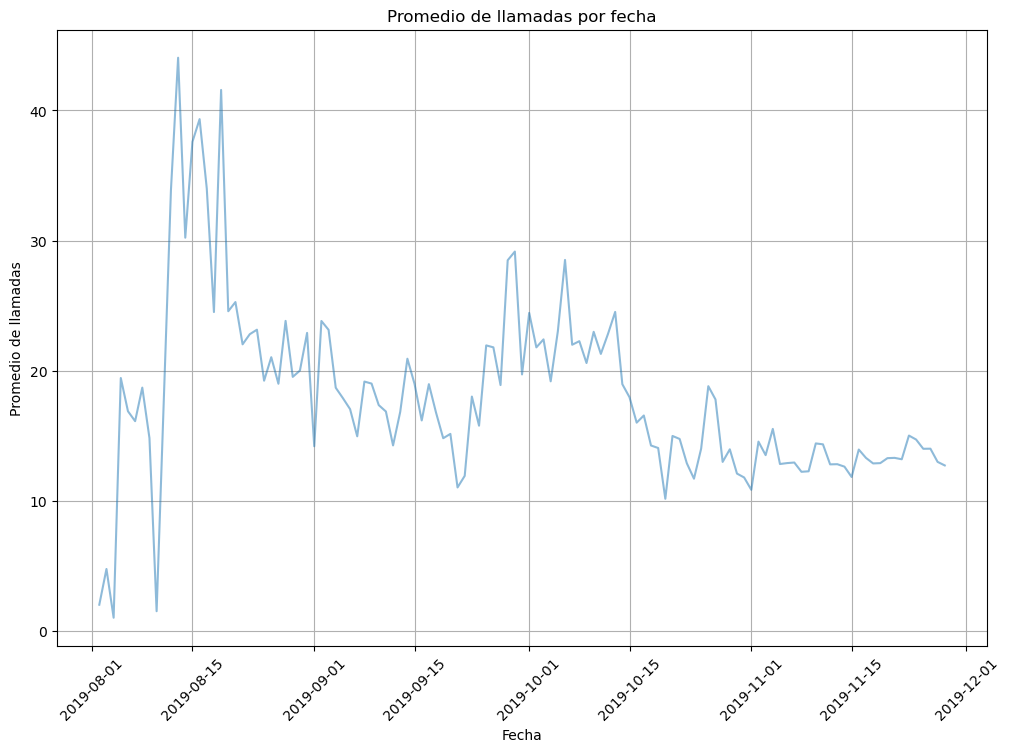

In [39]:
# Conteo de llamadas por fecha
data = calls[calls['is_missed_call'] == False]
llamadas_por_fecha = data.groupby('date')['calls_count'].mean().reset_index()
llamadas_por_fecha.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
plt.figure(figsize=(12, 8))
plt.plot(llamadas_por_fecha['Fecha'], llamadas_por_fecha['No. de llamadas'], alpha=0.5, )
plt.title('Promedio de llamadas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Promedio de llamadas')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Observmos que no hay un patrón claro en el promedio de llamadas realizadas en las fechas, esto podría deberse a la varidad de llamadas realizadas como vimos anteriormente

- Duración de las llamadas 

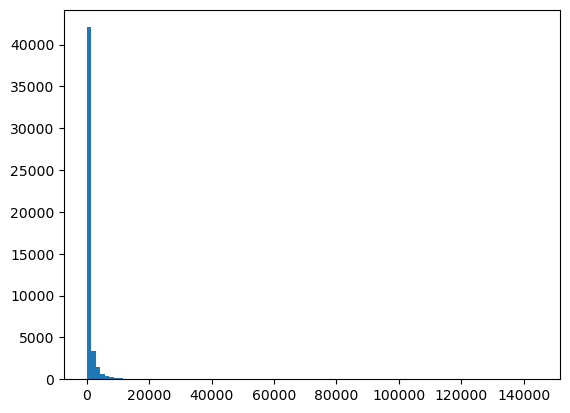

In [40]:
#Crear histograma para duración de llamdas
plt.hist(calls['call_duration'], bins=100)
plt.show()

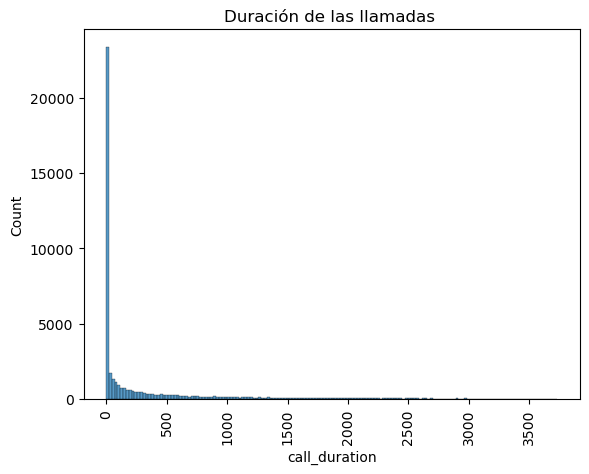

In [41]:
#Crear histograma para duración de llamdas sin valores atípíco 
call_duration_filtered = calls.query('call_duration <= 3730.000000')
ax = sns.histplot(data=call_duration_filtered, x="call_duration")
ax.set_title("Duración de las llamadas ")
ax.tick_params(axis='x', rotation=90)
plt.show();

Observamos que la mayoría de las llamadas son cortas durando menos de un minuto, ahora bien vamos a realziar otro filtro quitando las llamadas perdidas (duración 0) que son la mayoría, para visualizar mejor la duración de llamadas efectivas 


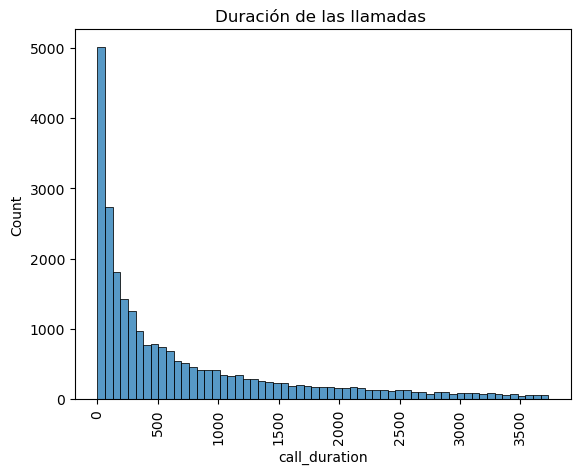

In [120]:
call_duration_filtered2 = call_duration_filtered.query('call_duration > 0.000000')
ax = sns.histplot(data=call_duration_filtered2, x="call_duration")
ax.set_title("Duración de las llamadas ")
ax.tick_params(axis='x', rotation=90)
plt.show();

Vemos una distribución sesgada a la derecha lo que inidica que la media y moda de valores se encuntran en llamadas menores a 100 segundos, siendo es menos probable hallar llamadas más largas

- Fechas donde se realizaron más llamadas 

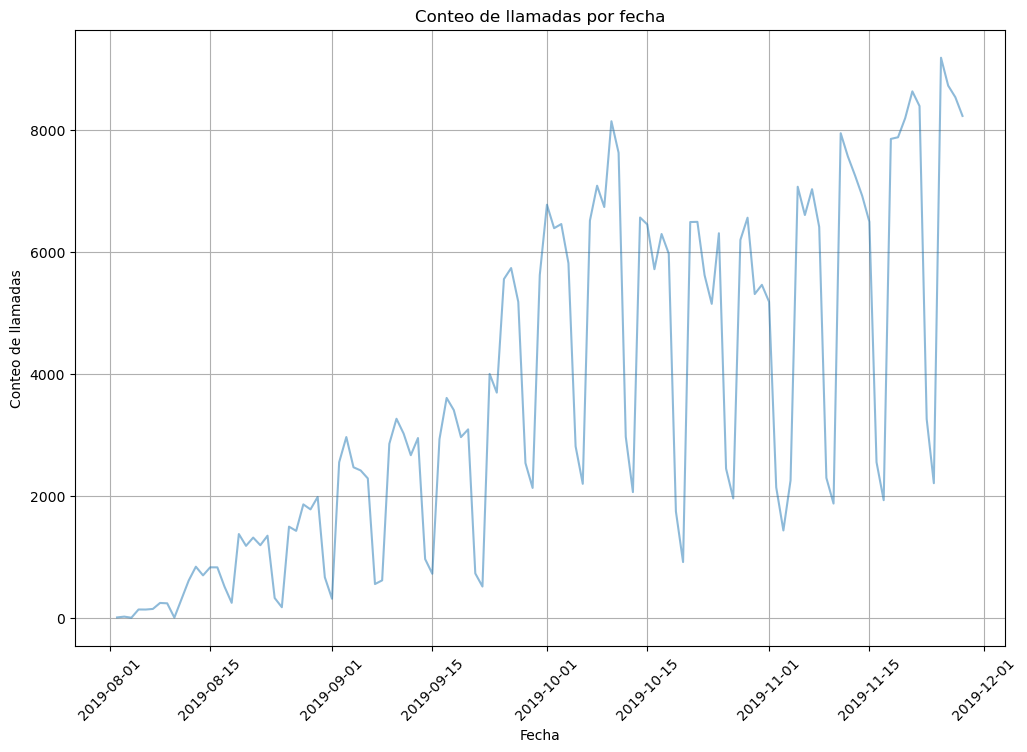

In [43]:

llamadas_por_fecha2 = data.groupby('date')['calls_count'].sum().reset_index()
llamadas_por_fecha2.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
plt.figure(figsize=(12, 8))
plt.plot(llamadas_por_fecha2['Fecha'], llamadas_por_fecha2['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de llamadas')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

- Llamadas por fecha sin valores atípicos 

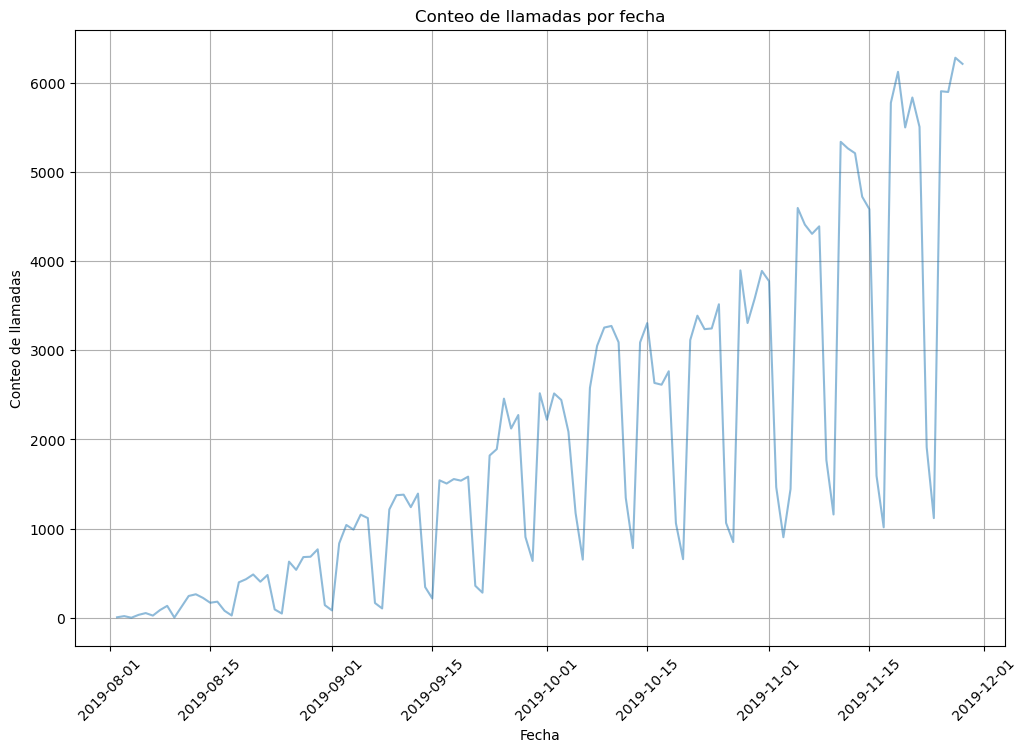

In [44]:
a = data.query('calls_count <= 62.000000')
llamadas_por_fecha2_ = a.groupby('date')['calls_count'].sum().reset_index()
llamadas_por_fecha2_.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
plt.figure(figsize=(12, 8))
plt.plot(llamadas_por_fecha2_['Fecha'], llamadas_por_fecha2_['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de llamadas')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

- Fechas con mayor cantidad de llamadas perdidas

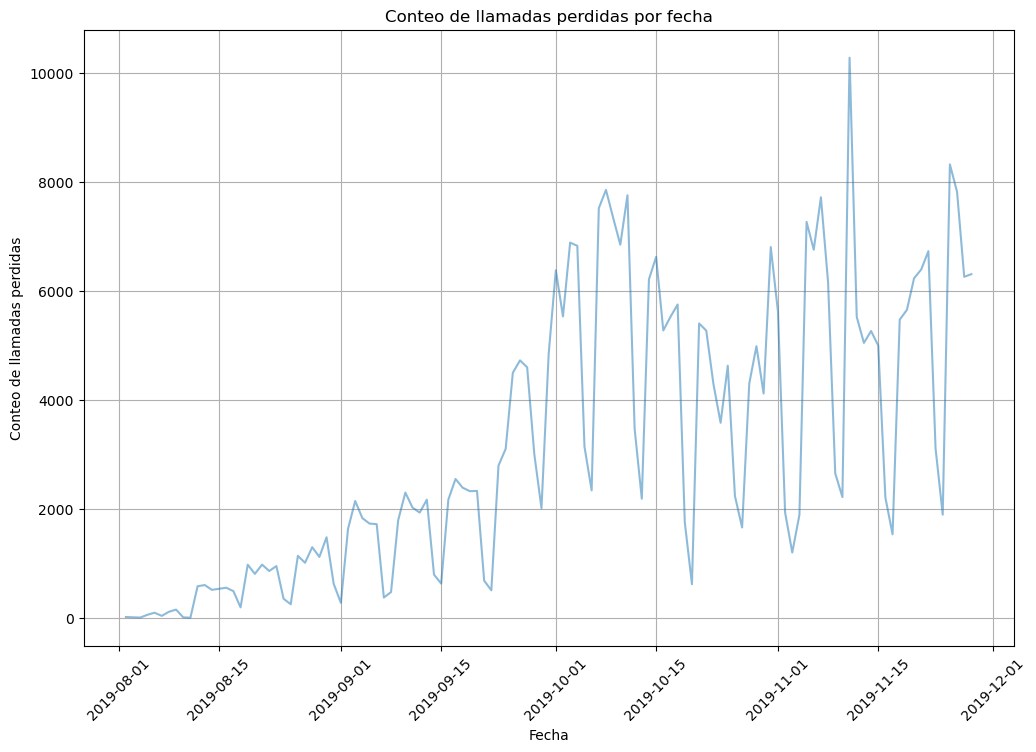

In [45]:
data2 = calls[calls['is_missed_call'] == True]
llamadas_perdidas = data2.groupby('date')['calls_count'].sum().reset_index()
llamadas_perdidas.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
plt.figure(figsize=(12, 8))
plt.plot(llamadas_perdidas['Fecha'], llamadas_perdidas['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas perdidas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de llamadas perdidas')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

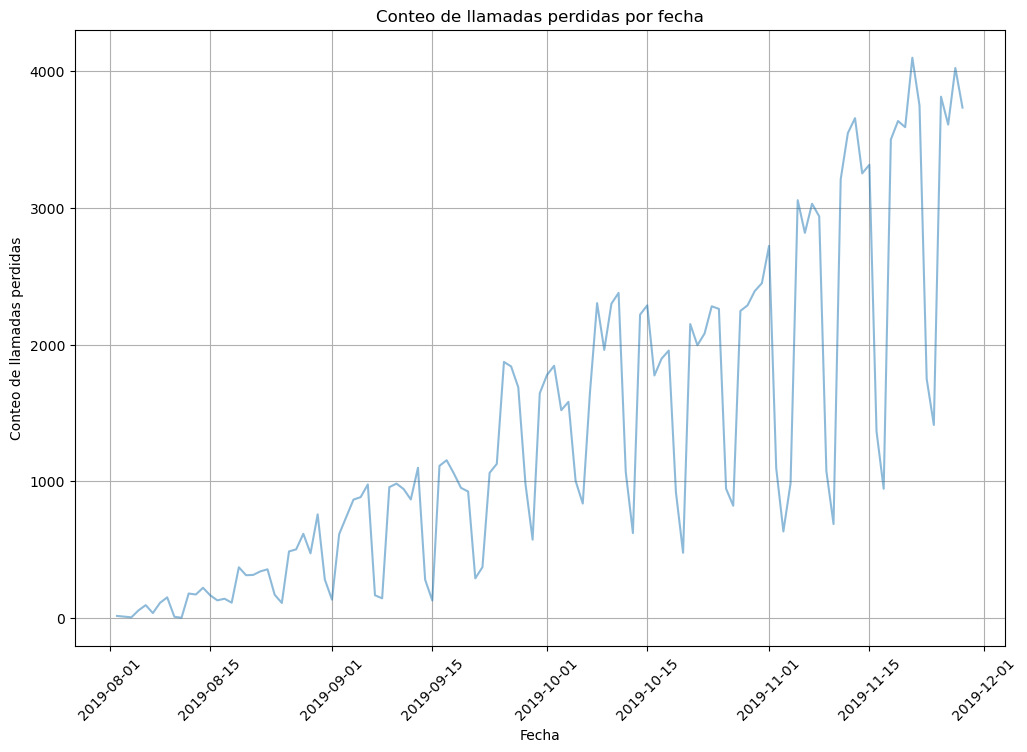

In [46]:
#Cantidad llamadas perdidas sin valores atípicos 
b = data2.query('calls_count <= 62.000000')
llamadas_perdidas_ = b.groupby('date')['calls_count'].sum().reset_index()
llamadas_perdidas_.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
plt.figure(figsize=(12, 8))
plt.plot(llamadas_perdidas_['Fecha'], llamadas_perdidas_['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas perdidas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de llamadas perdidas')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

- Conteo de llamadas por día de la semana 

In [47]:
#Extraer días de la semana 
calls['day']= calls['date'].dt.dayofweek

In [48]:
calls.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day
0,166377,2019-08-04,in,False,0,True,2,0,4,4,6
1,166377,2019-08-05,out,True,880022,True,3,0,5,5,0
2,166377,2019-08-05,out,True,880020,True,1,0,1,1,0
3,166377,2019-08-05,out,True,880020,False,1,10,18,8,0
4,166377,2019-08-05,out,False,880022,True,3,0,25,25,0


Para este caso, el método regresa el días 0 como lunes y domingo como 6

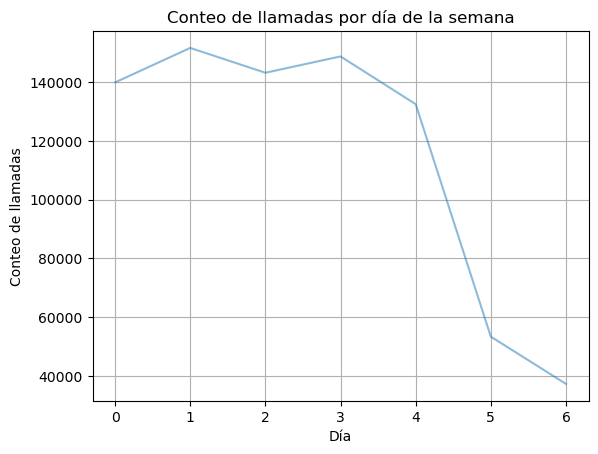

In [49]:
#Conteo llamadas totales por día de la semana
llamadas_por_semana = calls.groupby('day')['calls_count'].sum().reset_index()
llamadas_por_semana.columns = ['Día', 'No. de llamadas']
#Mostrar gráfico
plt.plot(llamadas_por_semana['Día'], llamadas_por_semana['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas por día de la semana')
plt.xlabel('Día')
plt.ylabel('Conteo de llamadas')
plt.grid(True)
plt.show()

In [50]:
#Filtrar llamadas exitosas 
data_ok_calls = calls[calls['is_missed_call'] == False]

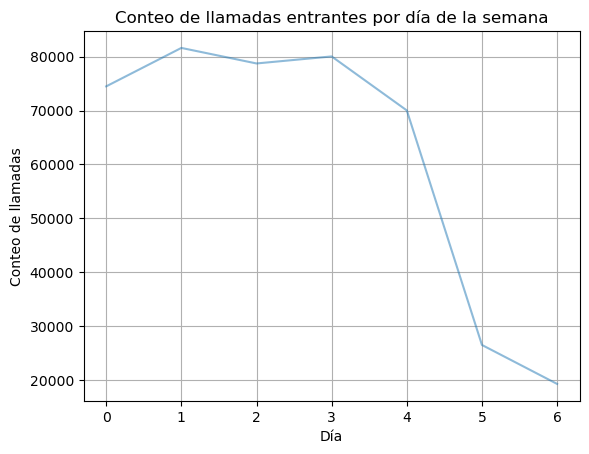

In [51]:
#Conteo llamadas entarntes por día de la semana
#Recuperamos varibale data para filtrar llamadas exitosas 
llamadas_por_semana1 = data_ok_calls.groupby('day')['calls_count'].sum().reset_index()
llamadas_por_semana1.columns = ['Día', 'No. de llamadas']
#Mostrar gráfico
plt.plot(llamadas_por_semana1['Día'], llamadas_por_semana1['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas entrantes por día de la semana')
plt.xlabel('Día')
plt.ylabel('Conteo de llamadas')
plt.grid(True)
plt.show()

In [52]:
#Filtrar llamadas perdidas
data_miss_calls = calls[calls['is_missed_call'] == True]

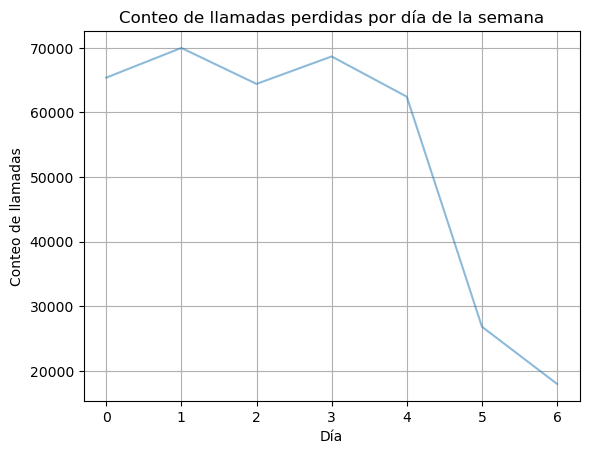

In [53]:
#Conteo llamadas entarntes por día de la semana
#Recuperamos varibale data para filtrar llamadas exitosas 
llamadas_por_semana2 = data_miss_calls.groupby('day')['calls_count'].sum().reset_index()
llamadas_por_semana2.columns = ['Día', 'No. de llamadas']
#Mostrar gráfico
plt.plot(llamadas_por_semana2['Día'], llamadas_por_semana2['No. de llamadas'], alpha=0.5, )
plt.title('Conteo de llamadas perdidas por día de la semana')
plt.xlabel('Día')
plt.ylabel('Conteo de llamadas')
plt.grid(True)
plt.show()

Observamso tendencias simialres en los tres gráficos (general, entrantes y perdidas)

- Comparación general de llamadas entrantes y llamadas perdidas 

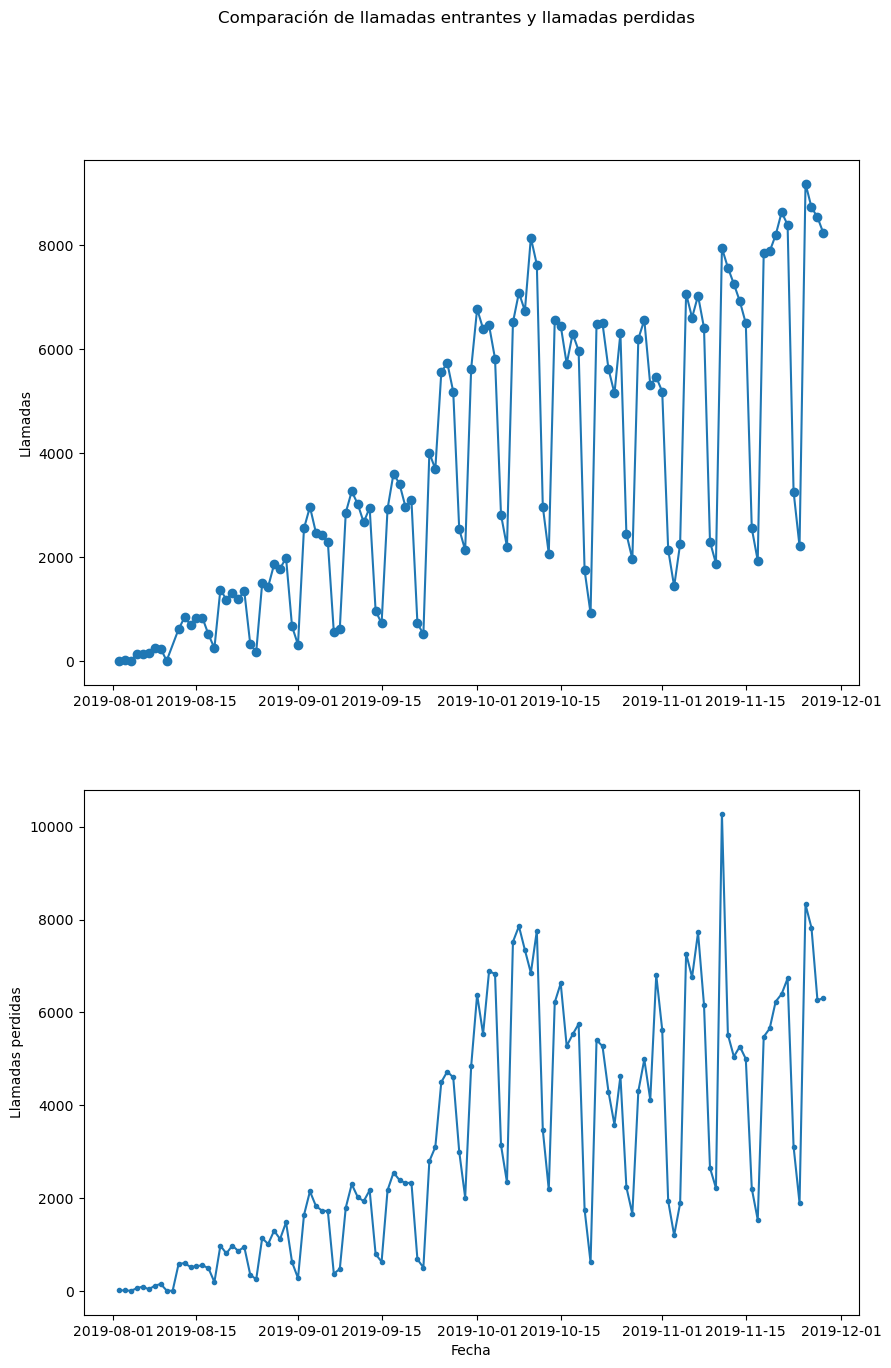

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))
fig.suptitle('Comparación de llamadas entrantes y llamadas perdidas ')

ax1.plot(llamadas_por_fecha2['Fecha'], llamadas_por_fecha2['No. de llamadas'], 'o-')
ax1.set_ylabel('Llamadas')

ax2.plot(llamadas_perdidas['Fecha'], llamadas_perdidas['No. de llamadas'], '.-')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Llamadas perdidas')

plt.show()

- Comparación de llamadas internas y externas

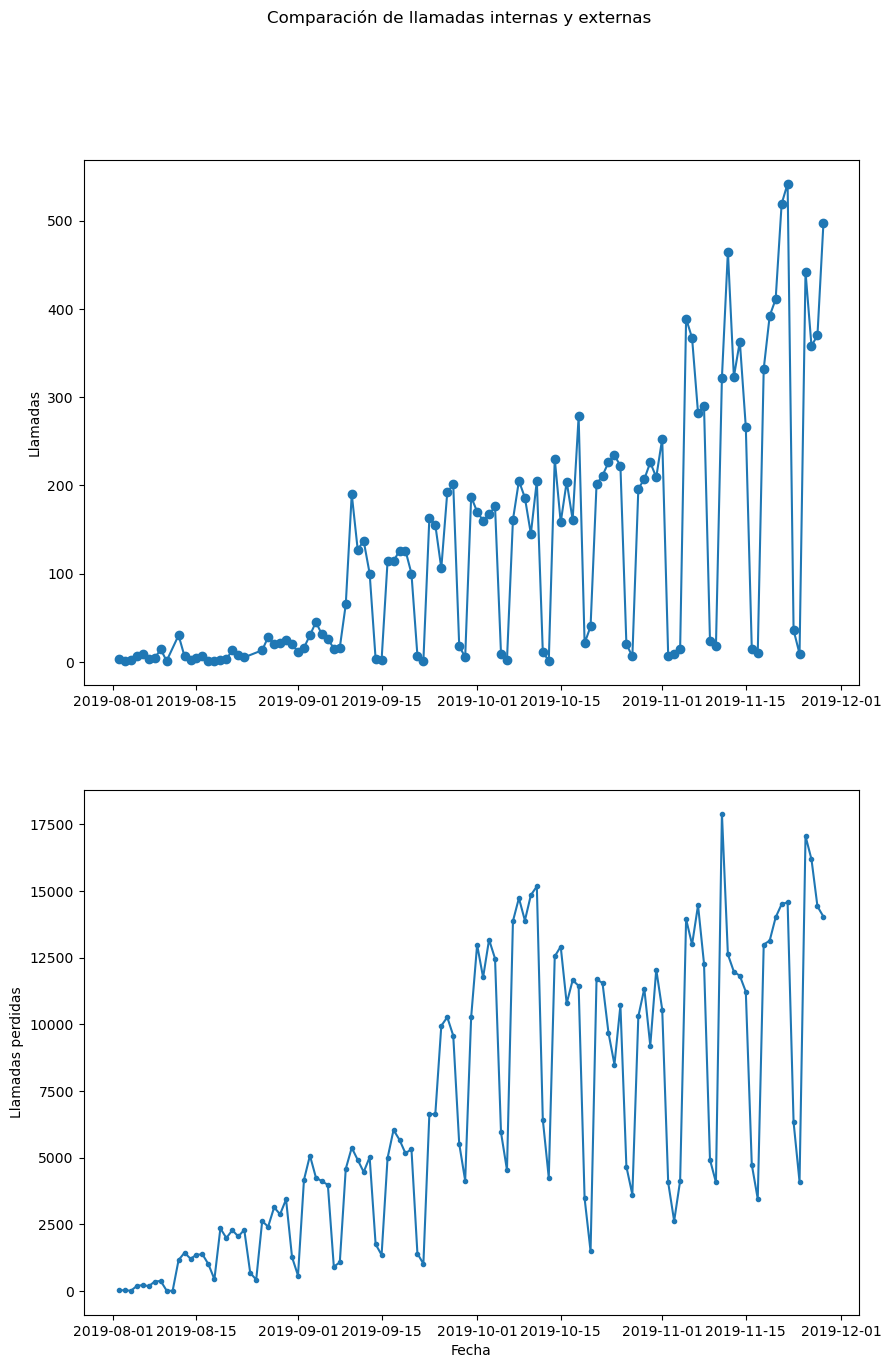

In [55]:
#Conteo llamadas internas
internal = calls[calls['internal'] == True]
llamadas_int = internal.groupby('date')['calls_count'].sum().reset_index()
llamadas_int.columns = ['Fecha', 'No. de llamadas']
#Conteo llamadas externas 
external = calls[calls['internal'] == False]
llamadas_ext = external.groupby('date')['calls_count'].sum().reset_index()
llamadas_ext.columns = ['Fecha', 'No. de llamadas']
#Mostrar gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))
fig.suptitle('Comparación de llamadas internas y externas')

ax1.plot(llamadas_int['Fecha'], llamadas_int['No. de llamadas'], 'o-')
ax1.set_ylabel('Llamadas')

ax2.plot(llamadas_ext['Fecha'], llamadas_ext['No. de llamadas'], '.-')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Llamadas perdidas')

plt.show()

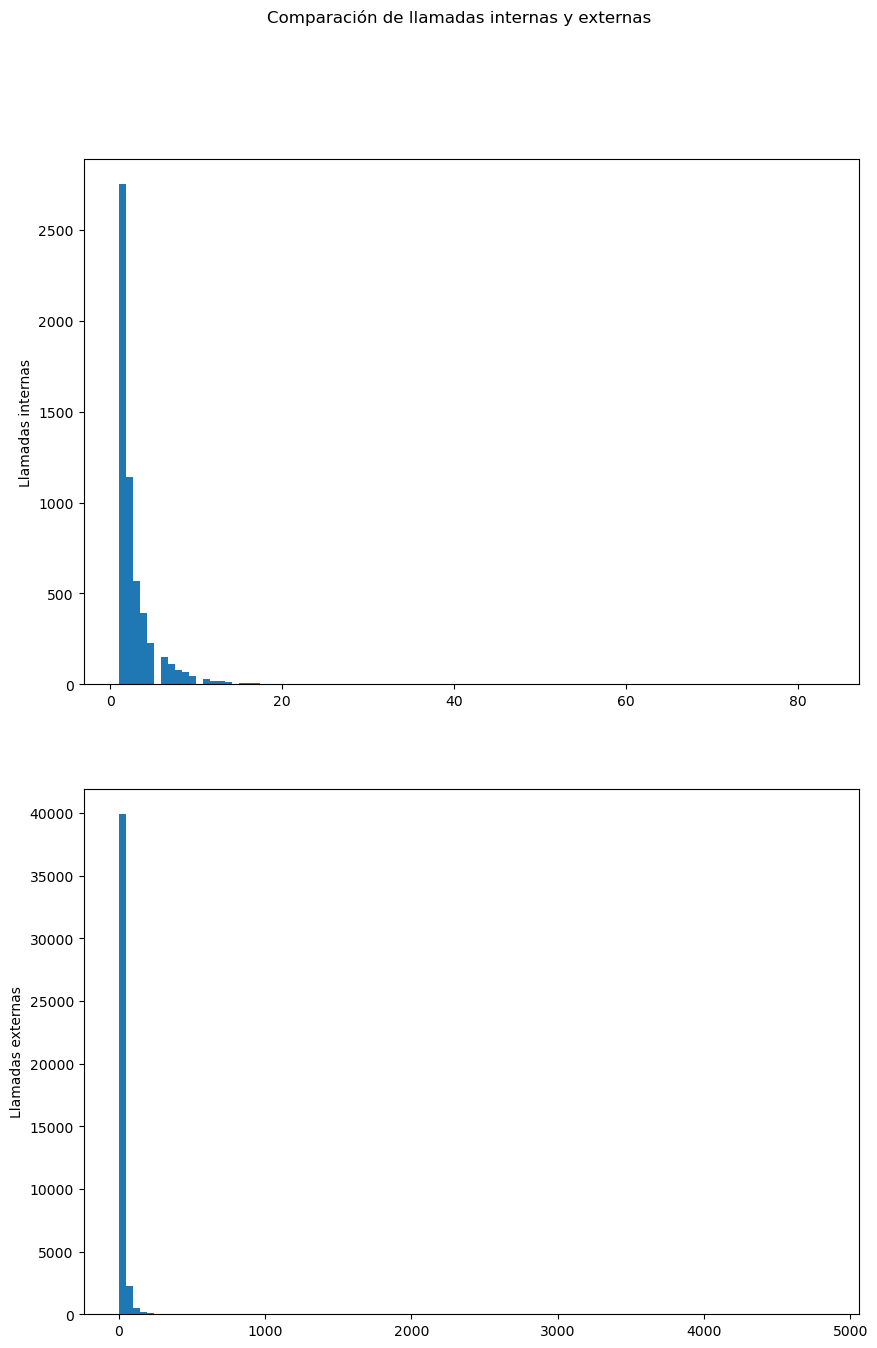

In [56]:
#Gráficos distribución llamdas intenas y externas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))
fig.suptitle('Comparación de llamadas internas y externas')

ax1.hist(internal['calls_count'], bins=100)
ax1.set_ylabel('Llamadas internas')

ax2.hist(external['calls_count'], bins=100)
ax2.set_ylabel('Llamadas externas')

plt.show()

- Tiempos de espera 

In [57]:
calls['wait_time'].describe()

count    48892.000000
mean       290.887671
std       1133.354018
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: wait_time, dtype: float64

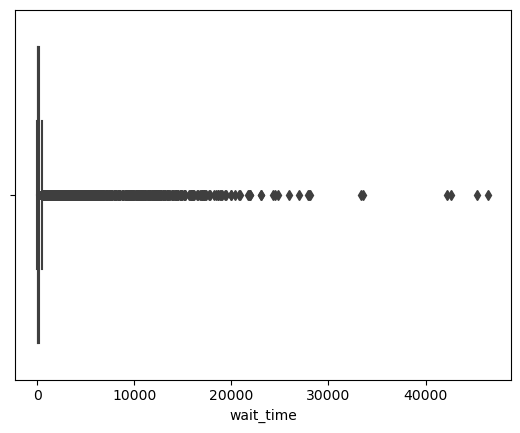

In [58]:
#Graficar tiempos de espera largos 
sns.boxplot(data=calls, x=calls['wait_time'])
plt.show()

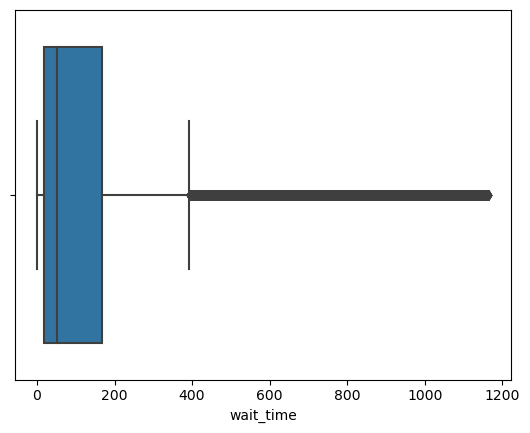

In [59]:
#Graficar tiempos de espera largos sin valores atípicos 
data_wait = calls.query('wait_time <= 1164.000000 and wait_time > 0.000000')
sns.boxplot(data=data_wait, x=data_wait['wait_time'])
plt.show()

#### Hallazgo sobre estadísticas generales
Observamos que la mayoría de las llamdas no pasan de 100 segundos, esto dependerá de las decisiones de negocio ya que una duración menor implicaría rapidez en el servicio. 
En una comparación de llamadas perdidas y llamadas entrantes exitosas vemos que no hay un patrón definido en cuanto a las mismas, siendo las dos gráficas muy similares, si bien hay picos de llamadas perdidas estos son similares a los obtenidos en las llamadas entrantes exitosas por lo que se sugiere que esto se debe a días con amyor demanda y por ende podríamos decir que la fecha no influye de manera significativa en la cantidad de llamadas perdidas o exitosas, así mismo, observamos días con mayor demanda son los primeros días de la semana, bajando significativmante de viernes a domingo, siendo que los picos de llamdas en realidad son debido a las cargas de trabajo a lo largo de la semana. 

### Datos de operadores 

- Identificar número de llamadas totales por operador 

In [60]:
# Calcular el número de llamadas por operador 
llamdas_por_operador = calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Ordenar los operadores por el número de llamadas de mayor a menor
llamdas_por_operador = llamdas_por_operador.sort_values(by='calls_count', ascending=False)




In [61]:
# Mostrar los 10 operadores con mayor número de llamadas
print("Operadores con más llamadas:")
llamdas_por_operador.head(10)

Operadores con más llamadas:


,operator_id,calls_count
0,0,104399
30,885890,60221
29,885876,59429
584,929428,23754
552,925922,20021
318,908640,14239
583,929426,11189
2,879898,7312
848,945286,6880
854,945302,6138


In [62]:
print("Operadores con menos llamadas:")
llamdas_por_operador.tail(10)

Operadores con menos llamadas:


,operator_id,calls_count
698,937770,1
810,941826,1
699,937772,1
701,937778,1
716,937872,1
777,940512,1
778,940514,1
1028,960666,1
809,941816,1
78,891254,1


- Identificar llamadas entrantes exitosas

In [63]:
# Calcular el número de llamadas por operador 
llamdas_por_operador2 = data_ok_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Ordenar los operadores por el número de llamadas de mayor a menor
llamdas_por_operador2 = llamdas_por_operador2.sort_values(by='calls_count', ascending=False)



In [64]:
# Mostrar los 10 operadores con mayor número de llamadas
print("Operadores con más llamadas entrantes:")
llamdas_por_operador2.head(10)

Operadores con más llamadas entrantes:


,operator_id,calls_count
28,885890,36414
27,885876,36099
541,925922,10763
312,908640,6075
362,913938,5050
2,879898,4952
570,929426,4842
571,929428,4636
106,893804,4523
934,952948,4277


In [65]:
# Mostrar los 10 operadores con mayor número de llamadas
print("Operadores con más llamadas entrantes:")
llamdas_por_operador2.tail(10)

Operadores con más llamadas entrantes:


,operator_id,calls_count
206,902238,1
73,891192,1
1000,960666,1
848,946020,1
849,946032,1
850,946072,1
851,946468,1
995,959596,1
361,913886,1
54,890234,1


- Identificar  llamadas perdidas por operador

In [66]:
# Calcular el número de llamadas por operador 
llamdas_por_operador3 = data_miss_calls.groupby('operator_id')['calls_count'].sum().reset_index()

# Ordenar los operadores por el número de llamadas de mayor a menor
llamdas_por_operador3 = llamdas_por_operador3.sort_values(by='calls_count', ascending=False)

In [67]:
# Mostrar los 10 operadores con mayor número de llamadas
print("Operadores con más llamadas perdidas:")
llamdas_por_operador3.head(10)

Operadores con más llamadas perdidas:


,operator_id,calls_count
0,0,103434
26,885890,23807
25,885876,23330
475,929428,19118
453,925922,9258
259,908640,8164
474,929426,6347
691,945286,3626
697,945302,3184
366,919364,2688


In [68]:
# Mostrar los 10 operadores con mayor número de llamadas
print("Operadores con más llamadas perdidas:")
llamdas_por_operador3.tail(10)

Operadores con más llamadas perdidas:


,operator_id,calls_count
525,934430,1
534,935958,1
538,936514,1
553,937710,1
554,937716,1
561,937770,1
564,937778,1
121,896538,1
797,955164,1
562,937772,1


In [69]:
#Creamos un nuevo df para agrupar las llamadas  
callsByops = (
    calls.drop(['user_id', 'date', 'direction','internal' ,'is_missed_call', 'call_duration','total_call_duration', 'day'], axis=1)
    .groupby('operator_id', as_index=False)
    .agg({'calls_count': pd.Series.nunique})    
)
callsByops.columns = ['operator_id', 'calls']

callsByops.head()

,operator_id,calls
0,0,197
1,879896,26
2,879898,79
3,880020,5
4,880022,10


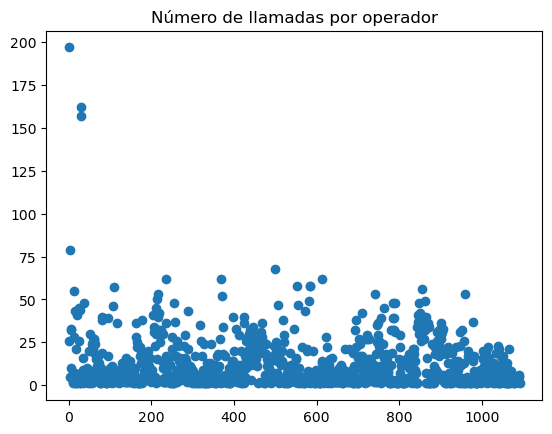

In [70]:
#Graficamos las llamadas por operador
x_values = pd.Series(range(0,len(callsByops)))

plt.scatter(x= x_values,
             y= callsByops['calls'], 
             )
plt.title('Número de llamadas por operador')
plt.show()

Observamos que el operador con más llamadas es aquel con identifación 0, es decir los que no tienen número de identificación. 
por otro lado vemos que hay usuarios que tienen tanto llamadas perdidas como llamadas entrantes exitosas, por lo que tampoco hay un patrón en temas de llamadas perdidas, siendo que los operadores con más llamadas perdidas son aquellos con más carga de trabajo.

### Relación entre tipos clientes y llamadas

Revisaremos si los clientes influyen en las llamdas perdidas o tiempos de espera largos.

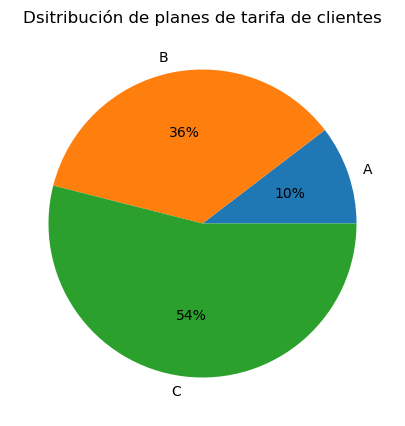

In [71]:
# Graficamos la distribución de los clientes 
plt.figure(figsize=(10, 5))

data_plan = clients.groupby('tariff_plan')['user_id'].count().reset_index()
data_plan.columns = ['tariff_plan', 'count']

labels = ['A', 'B', 'C']
plt.pie(data_plan['count'], labels=labels, autopct='%0.f%%')
plt.title('Dsitribución de planes de tarifa de clientes')
plt.show()

In [72]:
#Unimos datos de clients y calls mediante merge 
df= calls.merge(clients, on="user_id", how="left")
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2,0,4,4,6,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3,0,5,5,0,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1,0,1,1,0,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1,10,18,8,0,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3,0,25,25,0,B,2019-08-01


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  int64         
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  category      
 3   internal             48892 non-null  bool          
 4   operator_id          48892 non-null  int32         
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
 9   wait_time            48892 non-null  int64         
 10  day                  48892 non-null  int32         
 11  tariff_plan          48892 non-null  category      
 12  date_start           48892 non-null  datetime64[ns]
dtypes: bool(2), category(2), dateti

In [74]:
#Agrupamos datos por clientes y tiempo de espera
wait_clients = df.groupby('tariff_plan')['wait_time'].sum().reset_index()
wait_clients

,tariff_plan,wait_time
0,A,8114613
1,B,2800213
2,C,3307254


In [75]:
#Agrupamos datos por clientes y llamadas exitosas
df_filter = df[df['is_missed_call'] == False]
ok_clients = df_filter.groupby('tariff_plan')['is_missed_call'].count().reset_index()
ok_clients

,tariff_plan,is_missed_call
0,A,7977
1,B,9504
2,C,10014


In [76]:
#Agrupamos datos por clientes y llamadas perdidas
df_filter2 = df[df['is_missed_call'] == True]
miss_clients = df_filter2.groupby('tariff_plan')['is_missed_call'].count().reset_index()
miss_clients

,tariff_plan,is_missed_call
0,A,5553
1,B,7696
2,C,8148


Observamos que los clientes con más llamadas perdidas y entrantes son los del grupo C, sin embargo como podemos observar en la gráfica con el 54% de los clientes.

A continuación se  revisa la relación entre la feha de inicio de cada cliente y el número de llamadas perdidas y tiempo de espera

- Análsis de cohortes para llamadas exitosas 

In [77]:
#Extraer mes de la fecha 
df_filter['month'] = df_filter['date'].dt.to_period('M').dt.to_timestamp()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11708\718168840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['month'] = df_filter['date'].dt.to_period('M').dt.to_timestamp()


In [78]:
#Agrupar por cohortes
# Identificar la primera llamada exitosa de cada usuario
first_calls = df_filter.groupby('user_id')['date'].min().reset_index()
first_calls.columns = ['user_id', 'first_call']

# Extraer el mes y el año de la primera compra
first_calls['first_call'] = first_calls['first_call'].astype('datetime64[ns]')
first_calls['first_call_month'] = first_calls['first_call'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_calls.head())

   user_id first_call first_call_month
0   166377 2019-08-05          2019-08
1   166391 2019-08-06          2019-08
2   166392 2019-08-20          2019-08
3   166399 2019-08-12          2019-08
4   166405 2019-08-06          2019-08


In [79]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:
cohort_sizes = first_calls.groupby('first_call_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_call_month', 'n_users']
cohort_sizes.head()

,first_call_month,n_users
0,2019-08,66
1,2019-09,94
2,2019-10,91
3,2019-11,36


In [80]:
#Agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete = pd.merge(df_filter,first_calls, on='user_id')
data_complete.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,tariff_plan,date_start,month,first_call,first_call_month
10967,167035,2019-11-19,in,False,923526,False,26,2074,2229,155,1,C,2019-08-29,2019-11-01,2019-09-30,2019-09


In [81]:
#Ahora vamos a agrupar la tabla de llamadas por mes y totalizar las llamadas. 
cohorts = data_complete.groupby(['first_call_month','month']).agg({'calls_count': 'sum'}).reset_index()
cohorts.sample()

,first_call_month,month,calls_count
9,2019-11,2019-11-01,10870


In [82]:
#Agreguemos datos sobre cuántos usuarios realizaron usaron por primera vez el servicio  en cada mes 
report = pd.merge(cohort_sizes, cohorts, on='first_call_month')


In [83]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report['first_call_month'] = report['first_call_month'].dt.to_timestamp()
report['age'] = (
    report['month'] - report['first_call_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')


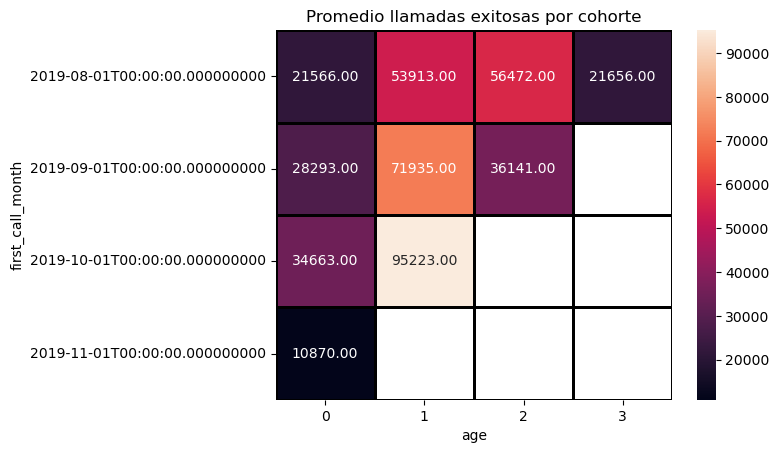

In [84]:
#Visualizamos como tabla dinámica 
output = report.pivot_table(index='first_call_month', columns='age', values='calls_count')
#creamos gráfica para visualización 
plt.title('Promedio llamadas exitosas por cohorte')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

- Análsis de cohortes para llamadas perdidas 

In [85]:
#Extraer mes de la fecha 
df_filter2['month'] = df_filter2['date'].dt.to_period('M').dt.to_timestamp()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_11708\1218291166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['month'] = df_filter2['date'].dt.to_period('M').dt.to_timestamp()


In [86]:
#Agrupar por cohortes
# Identificar la primera llamada exitosa de cada usuario
first_calls2 = df_filter2.groupby('user_id')['date'].min().reset_index()
first_calls2.columns = ['user_id', 'first_call']

# Extraer el mes y el año de la primera compra
first_calls2['first_call'] = first_calls2['first_call'].astype('datetime64[ns]')
first_calls2['first_call_month'] = first_calls2['first_call'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_calls2.head())

   user_id first_call first_call_month
0   166377 2019-08-04          2019-08
1   166391 2019-08-06          2019-08
2   166392 2019-08-02          2019-08
3   166399 2019-08-12          2019-08
4   166405 2019-08-03          2019-08


In [87]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:
cohort_sizes2 = first_calls2.groupby('first_call_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes2.columns = ['first_call_month', 'n_users']
cohort_sizes2.head()

,first_call_month,n_users
0,2019-08,82
1,2019-09,93
2,2019-10,107
3,2019-11,23


In [88]:
#Agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete_ = pd.merge(df_filter2,first_calls2, on='user_id')
data_complete_.sample()


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,tariff_plan,date_start,month,first_call,first_call_month
5540,166782,2019-11-18,in,False,0,True,4,0,91,91,0,C,2019-08-19,2019-11-01,2019-08-22,2019-08


In [89]:
#Ahora vamos a agrupar la tabla de llamadas por mes y totalizar las llamadas. 
cohorts_ = data_complete_.groupby(['first_call_month','month']).agg({'calls_count': 'sum'}).reset_index()
cohorts_.sample()

,first_call_month,month,calls_count
1,2019-08,2019-09-01,39575


In [90]:
#Agreguemos datos sobre cuántos usuarios realizaron usaron por primera vez el servicio  en cada mes 
report2 = pd.merge(cohort_sizes2, cohorts_, on='first_call_month')

In [91]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report2['first_call_month'] = report2['first_call_month'].dt.to_timestamp()
report2['age'] = (
    report2['month'] - report2['first_call_month']
) / np.timedelta64(1, 'M')
report2['age'] = report2['age'].round().astype('int')


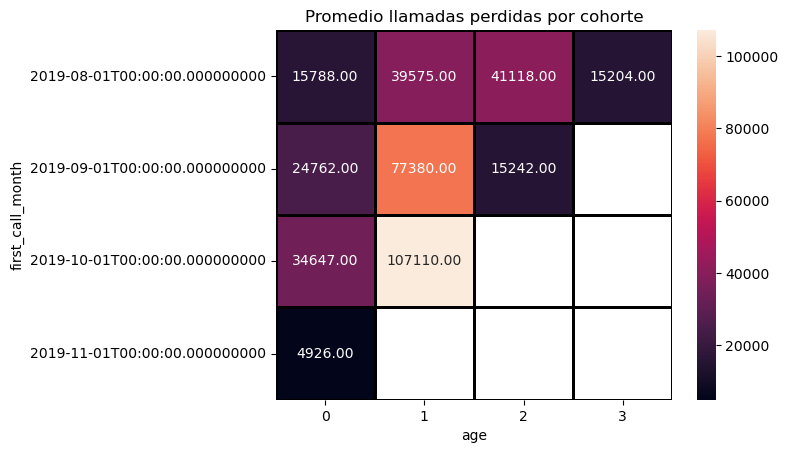

In [92]:
#Visualizamos como tabla dinámica 
output2 = report2.pivot_table(index='first_call_month', columns='age', values='calls_count')
#creamos gráfica para visualización 
plt.title('Promedio llamadas perdidas por cohorte')
sns.heatmap(
    output2,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Observamos que el cohort de octubre es el que tiene mayor cantidad de llamadas tanto perdidas como entrantes, seguido del cohort de septiembre, así que la antiguedad de los cohortes no influye necesariamente en la cantidad de llamadas o eficiencia de los trabajadores

A continuación realizamos un análisis estadístico para identificar si hay diferencia siginificativa entre los grupos de clientes o bien entre los grupos de usuarios que manejan el promedio de llamadas y aquellos que manejan valores atípicos

## Análisis estadístico 

In [93]:
df.sample()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,tariff_plan,date_start
34589,167650,2019-10-19,in,False,921306,False,8,538,694,156,5,C,2019-09-24


### Calcular diferencia entre media y operadores atípicos

Calcular diferencia entre media y otros valores para llamadas perdidas

In [94]:
# Filtrar llamadas perdidas
missed_calls_by_ops = df[df['is_missed_call'] == True]
missed_calls_by_ops = missed_calls_by_ops.groupby('operator_id')['is_missed_call'].count().reset_index()
missed_calls_by_ops.columns = ['operator_id', 'missed_call_count']
#Obtener la media de llamadas perdidas
avg_missed_calls_by_ops = missed_calls_by_ops.mean()['missed_call_count'].round()
# calcular 1 sigma de la desviación estándar como medida para definir valores atípicos
missed_calls_by_ops_mean = missed_calls_by_ops['missed_call_count'].mean()
missed_calls_by_ops_std = missed_calls_by_ops['missed_call_count'].std()
sigma = missed_calls_by_ops_mean + (1 * missed_calls_by_ops_std)

#Definir función para determinar si hay muchas llamadas perdidas
def missed_calls(row):
    missed_call = row['missed_call_count']
    
    #Aplica if para aquellos valores mayores a valor sigma (media y una desviación estándar)
    if missed_call < sigma:
        return 'False'
    else:
        return 'True'
    
missed_calls_by_ops['many_missed_calls'] = missed_calls_by_ops.apply(missed_calls, axis=1)


Calcular diferencia entre media y otros valores para tiempo de espera

In [95]:
#Repetir proceso para tiempo de espera
#Crear df con operadores agrupados por tiempo de espera
wait_time_by_ops = df.groupby('operator_id')['wait_time'].mean().round().reset_index()
# Calcular media y desviación estándar 
wait_time_mean = df['wait_time'].mean()
wait_time_std = df['wait_time'].std()
## calculate 1 sigma de la desviación estándar como medida para definir valores atípicos
sigma = wait_time_mean + (1 * wait_time_std)

# Definir función para determinar si tiempos de espera largos
def WaitingTime(row):
    wait_time = row['wait_time']
    
    # Aplica if para aquellos valores mayores a valor sigma (media y una desviación estándar)
    if wait_time < sigma:
        return 'False'
    else:
        return 'True'
    

wait_time_by_ops['inneficient_waiting_time'] = wait_time_by_ops.apply(WaitingTime, axis=1)

In [96]:
#Combinamos ambos df creados
df_ops = pd.merge(missed_calls_by_ops, wait_time_by_ops, on='operator_id')
#Calcualr número de llamadas por operador 
calls_by_ops = df.groupby('operator_id')['calls_count'].count().reset_index()
calls_by_ops.columns = ['operator_id', 'calls_count']
#Combinamos con df operadores
df_ops = pd.merge(df_ops, calls_by_ops, on='operator_id')

### Pruebas de hipótesis

In [97]:
#Revisar hipotesis, la duración de llamdas de operadores eficaces y poco eficaces es la misma en cuanto a llamadas perdidas
#Filtrar operadores poco eficaces 
ineffective_ops = df_ops[(df_ops['many_missed_calls'] == 'True')]
#Pasa id de operadores a array de numpy
ineffective_ops_id = ineffective_ops['operator_id'].to_numpy()
#filtrar datos operadores no eficaces
ineffective_ops_data = df[df['operator_id'].isin(ineffective_ops_id)]

#Fitrar opradores eficientes 
efficient_ops = df_ops[(df_ops['many_missed_calls'] == 'False')]
#Pasa id de operadores a array de numpy
efficient_ops_id = efficient_ops['operator_id'].to_numpy()
#filtrar datos operadores no eficaces
efficient_ops_data = df[df['operator_id'].isin(efficient_ops_id)]

#Prueba de hipótesis
results = st.ttest_ind(efficient_ops_data['call_duration'], ineffective_ops_data['call_duration'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula, la duración promedio de llamdas de usuarios eficientes y poco eficientes es diferente")
else:
    print("No podemos rechazar la hipótesis nula, la duración promedio llamdas de usuarios eficientes y poco eficientes es la misma") 



Se rechaza la hipótesis nula, la duración promedio de llamdas de usuarios eficientes y poco eficientes es diferente


In [98]:
#Revisar hipotesis, la duración de llamdas de operadores eficaces y poco eficaces es la misma con tiempos de espera largos
#Filtrar operadores poco eficaces 
ineffective_ops2 = df_ops[(df_ops['inneficient_waiting_time'] == 'True')]
#Pasa id de operadores a array de numpy
ineffective_ops2_id = ineffective_ops['operator_id'].to_numpy()
#filtrar datos operadores no eficaces
ineffective_ops2_data = df[df['operator_id'].isin(ineffective_ops2_id)]

#Fitrar opradores eficientes 
efficient_ops2 = df_ops[(df_ops['inneficient_waiting_time'] == 'False')]
#Pasa id de operadores a array de numpy
efficient_ops2_id = efficient_ops2['operator_id'].to_numpy()
#filtrar datos operadores no eficaces
efficient_ops2_data = df[df['operator_id'].isin(efficient_ops2_id)]

#Prueba de hipótesis
results = st.ttest_ind(efficient_ops2_data['call_duration'], ineffective_ops2_data['call_duration'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula, la duración promedio de llamdas de usuarios eficientes y poco eficientes es diferente")
else:
    print("No podemos rechazar la hipótesis nula, la duración promedio llamdas de usuarios eficientes y poco eficientes es la misma") 


Se rechaza la hipótesis nula, la duración promedio de llamdas de usuarios eficientes y poco eficientes es diferente


Observamos que la prueba de hipótesis muestra que se tiene diferencia estadistica signifcativa sin embargo por la cantidad de datos aplicaremos un z test para corroborar el resultado 

In [99]:
#Definir valores para ztest
a = efficient_ops_data['call_duration']
b= ineffective_ops_data['call_duration']

In [100]:
a2 = efficient_ops2_data['call_duration']
b2= ineffective_ops2_data['call_duration']

In [101]:
#Prueba de hipotesis ztest para operadores con llamadas perdidas
p_value=ztest(a, b)[1]

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazamos la hipotesis nula, hay diferencia significativa en los dos grupos")
else:
    print("No rechazamos la hipotesis nula, no hay diferencia significativa en los dos grupos" )

p-value:  2.2057787005370314e-89
Rechazamos la hipotesis nula, hay diferencia significativa en los dos grupos


In [102]:
#Prueba de hipotesis ztest para operadores con tiempos de espera largos
p_value=ztest(a2, b2)[1]

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazamos la hipotesis nula, hay diferencia significativa en los dos grupos")
else:
    print("No rechazamos la hipotesis nula, no hay diferencia significativa en los dos grupos" )

p-value:  1.6974602708780813e-209
Rechazamos la hipotesis nula, hay diferencia significativa en los dos grupos


Observamos que hay diferencia entre los dos grupos, es decir que hay operdores que tenian tiempos de espera largos o llamadas perdidas y aquellos que cumplen con al menos una caracteritica tienen tiempos de llamada promedio más cortos, aunque se vió que no había operdores con ambas caracteristicas, (tiempos de espera largos y varias llamadas perdidas). No podemos decir que hay correlación directa entre el tiempo de las llamadas o llamadas perdidas, pero si es un parámetro a considerar para obtener mejores resultados, por lo que obteniendo una valor como sigma dado en los ejercicios anteriores, al final de los peridos dados por la dirección o supervisores podremos dar un parámetro para identificar operadores poco eficaces y estimar que tendrán menor rendimiento en cuanto a duración de llamadas. Para mejorar la información obetenida se creará un algoritmo de datos para intentar predecir las llamadas perdidas, así como la agrupación por clusters de las variables dadas en el df de operadores, tiempos de espera largos y varias llamadas perdidas


## Machine learning 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  int64         
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  category      
 3   internal             48892 non-null  bool          
 4   operator_id          48892 non-null  int32         
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
 9   wait_time            48892 non-null  int64         
 10  day                  48892 non-null  int32         
 11  tariff_plan          48892 non-null  category      
 12  date_start           48892 non-null  datetime64[ns]
dtypes: bool(2), category(2), dateti

### Correción de datos

In [104]:
#Cambiar a tipo numérico
ml_df = pd.get_dummies(df)
ml_df.head()

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,date_start,direction_in,direction_out,tariff_plan_A,tariff_plan_B,tariff_plan_C
0,166377,2019-08-04,False,0,True,2,0,4,4,6,2019-08-01,True,False,False,True,False
1,166377,2019-08-05,True,880022,True,3,0,5,5,0,2019-08-01,False,True,False,True,False
2,166377,2019-08-05,True,880020,True,1,0,1,1,0,2019-08-01,False,True,False,True,False
3,166377,2019-08-05,True,880020,False,1,10,18,8,0,2019-08-01,False,True,False,True,False
4,166377,2019-08-05,False,880022,True,3,0,25,25,0,2019-08-01,False,True,False,True,False


In [105]:
#quitar columnas no necesarias para el análsisis 
ml_df = ml_df.drop(['date_start', 'date'], axis=1)

### Selección de algoritmo 

In [106]:
#Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = ml_df.drop(columns = ['is_missed_call'])
y = ml_df['is_missed_call']

# divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# crea un objeto StandardScaler y aplícalo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # entrena el scaler y transforma la matriz para el conjunto de entrenamiento
print(X_train_st[:5])

# aplica la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

[[-0.48643562 -0.36061282  0.37305356 -0.2443222  -0.22539114 -0.24268876
  -0.20784072  0.9636099  -0.82889605  0.82889605 -0.61895973  1.3571643
  -0.76821434]
 [ 1.17616322 -0.36061282  0.5784936  -0.21299936 -0.16230234 -0.19749875
  -0.24265726  1.55625211  1.20642389 -1.20642389 -0.61895973  1.3571643
  -0.76821434]
 [-1.29436518 -0.36061282  0.34628111 -0.10336944 -0.02560995 -0.04642875
  -0.10071289 -0.22167452 -0.82889605  0.82889605 -0.61895973 -0.73683046
   1.30172004]
 [-0.31116165  2.77305728  0.39239496 -0.2443222  -0.22539114 -0.25578731
  -0.26140463 -0.22167452 -0.82889605  0.82889605 -0.61895973 -0.73683046
   1.30172004]
 [-1.48466264 -0.36061282  0.30936933 -0.10336944 -0.22539114 -0.22194938
  -0.12303119  0.9636099  -0.82889605  0.82889605 -0.61895973  1.3571643
  -0.76821434]]


In [107]:
# Entrena el modelo en el set de entrenamiento con dos métodos:
#regresión logística;
#bosque aleatorio.

models = [LogisticRegression(), RandomForestClassifier()]

#Evalúa la exactitud, precisión y recall para ambos modelos 
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test_st)[:,1]
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('-----------------------------------------')

  
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.97
-----------------------------------------
RandomForestClassifier()
	Accuracy: 0.99
	Precision: 1.00
	Recall: 0.99
-----------------------------------------


Para este caso vemos que se deberá usar un modelo de RandomForestClassifier(), ya que obtuvo resultados cercanos al 100, por lo que este modelo permite obtener inofrmación muy precisa sobre si la llamada será llamda perdida o no.

### Creación de clusters

In [108]:
#Estandariza los datos.
sc = StandardScaler()
x_sc = sc.fit_transform(ml_df)

In [109]:
#Utiliza la función linkage()
linked = linkage(x_sc, method = 'ward')

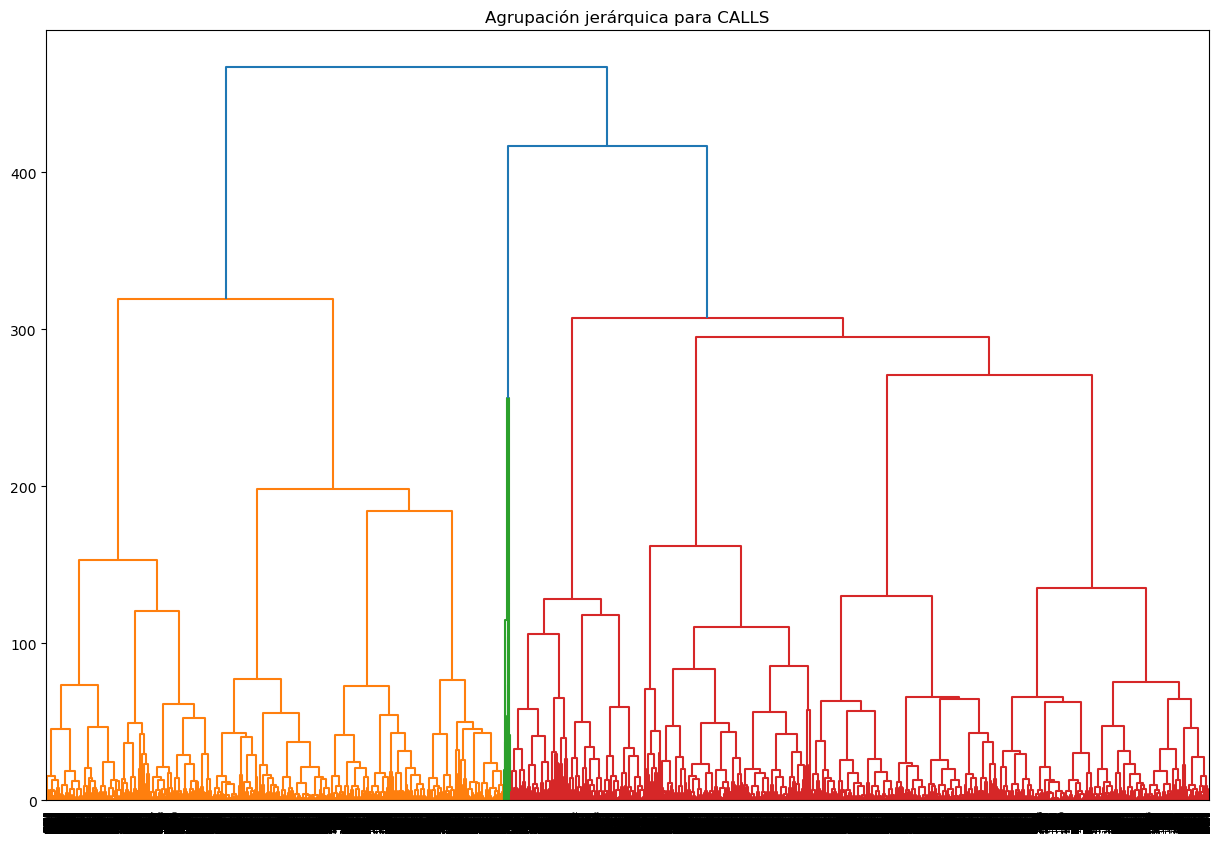

In [110]:
#trazar un dendrograma
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para CALLS')
plt.show()

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

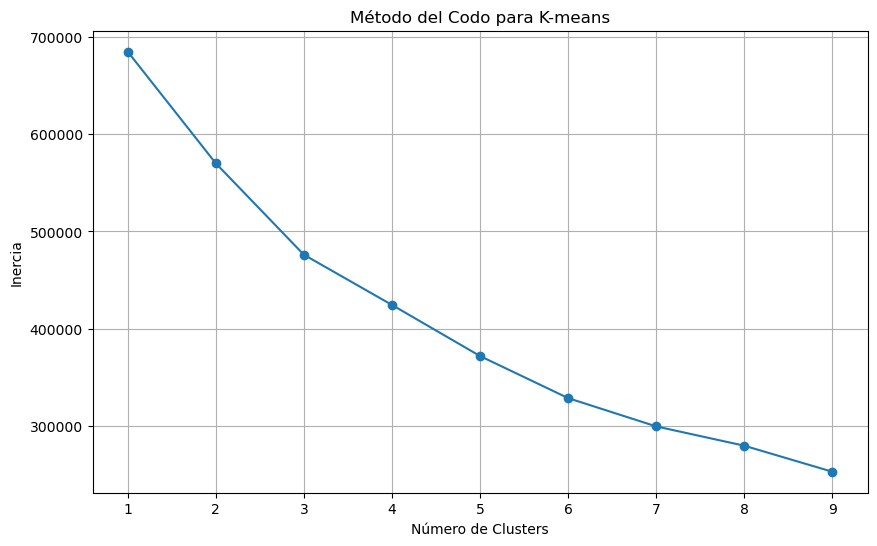

In [111]:
# Método del codo para determinar el número óptimo de clusters
range_n_clusters = range(1, 10)
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x_sc)
    inertia.append(kmeans.inertia_)
    
 # Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.grid()
plt.show()   

Observamos que tanto en el método del codo como en el dendograma el número ideal de clústers es 3 

In [112]:
#Entrena el modelo de clustering con el algortimo K-means 
km = KMeans(n_clusters=3)
# predice los clústeres para las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(x_sc)
# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
ml_df['cluster_km'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
ml_df.groupby(['cluster_km']).mean()

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,user_id,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,day,direction_in,direction_out,tariff_plan_A,tariff_plan_B,tariff_plan_C
cluster_km,,,,,,,,,,,,,,
0,167401.136626,0.128304,783326.575667,0.432942,15.796855,766.338088,1044.629543,278.291455,2.400826,0.413564,0.586436,0.423475,0.0,0.576525
1,167105.715640,0.093837,766805.008605,0.447442,9.503140,603.037907,765.840988,162.803081,2.333663,0.399070,0.600930,0.000000,1.0,0.000000
2,166774.783019,0.000000,844483.971698,0.339623,687.476415,37481.235849,50034.311321,12553.075472,2.160377,0.056604,0.943396,0.938679,0.0,0.061321


### Visualización de variables de los cluster

In [113]:
#Traza distribuciones de características para los clústeres. 
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

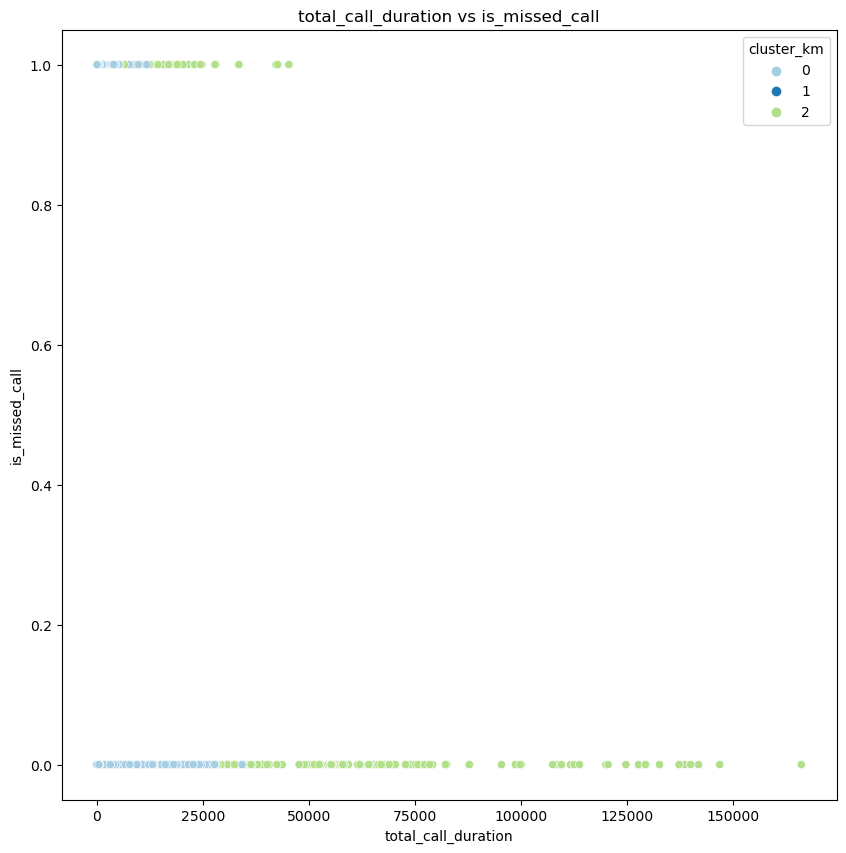

In [114]:
#Relación clusters entre llamadas peridas y duración
show_clusters_on_plot(ml_df, 'total_call_duration','is_missed_call',  'cluster_km')

Observamos que la duración de llamadas para los clusters que tienen mayor cantidad de llamadas perdidas también tienen la mayor duración de llamadas

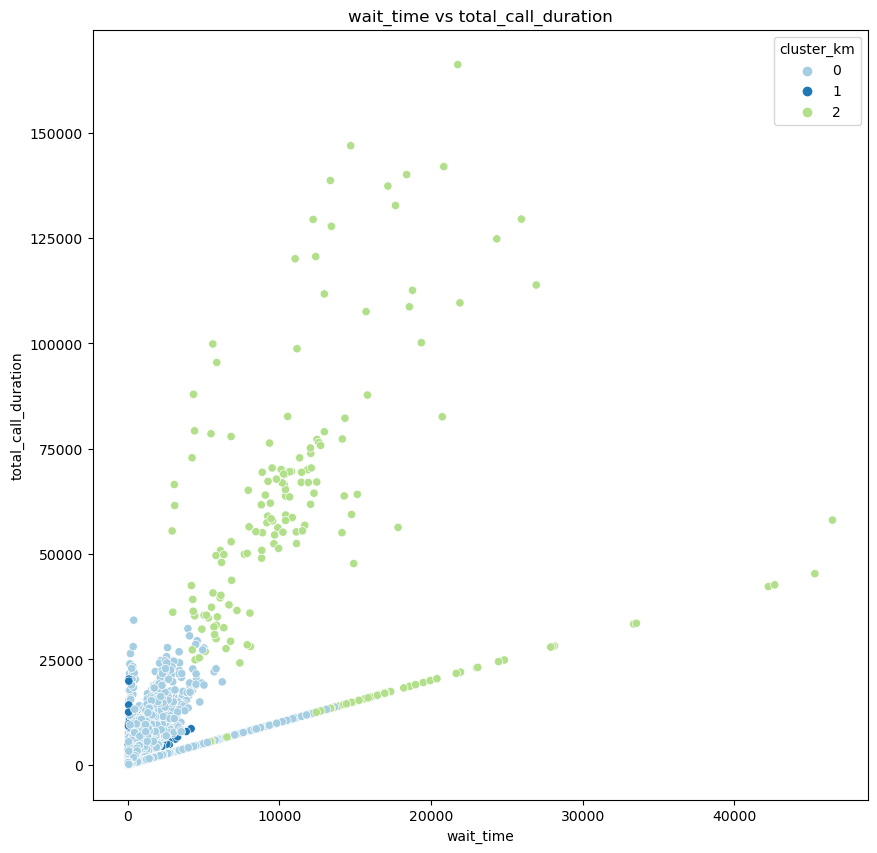

In [115]:
#Relación clusters entre tiempo de espera y duarción de llamadas
show_clusters_on_plot(ml_df, 'wait_time', 'total_call_duration', 'cluster_km')

Igualmente podemos ver que los cluster con mayor cantidad de duración de llamadas son aquellos con el tiempo de espera más largo


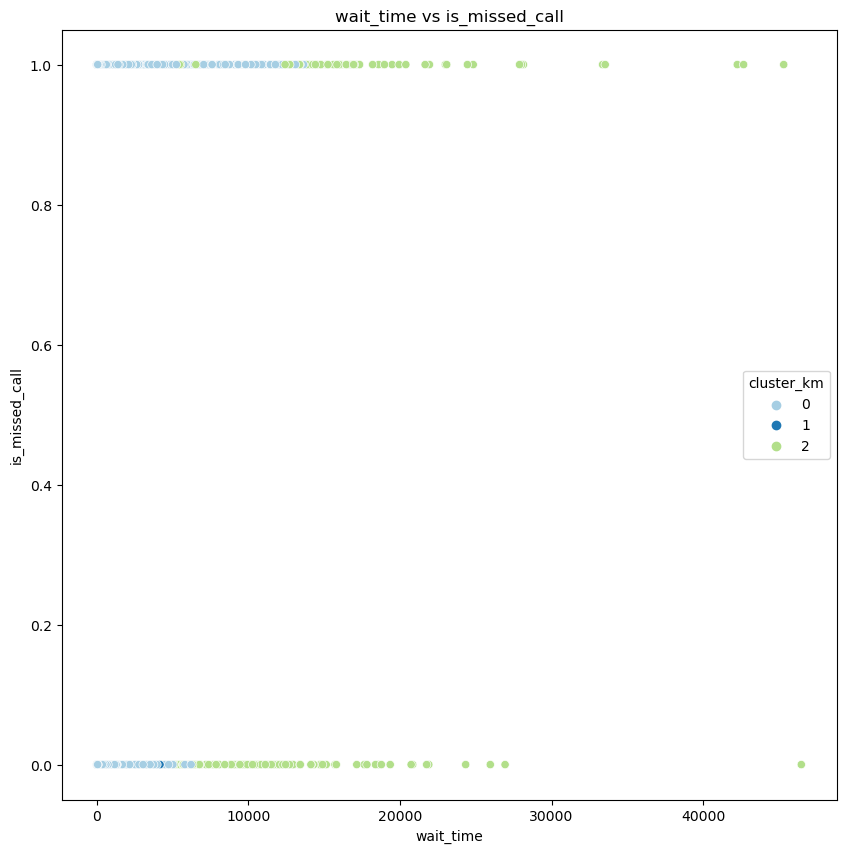

In [116]:
#Relación clusters entre tiempo de espera y llamada perdidas
show_clusters_on_plot(ml_df, 'wait_time', 'is_missed_call', 'cluster_km')

Observmaos que los clusters se agruapan con tiempos de espera más cortos tienden a obtener menor cantidad de llamadas perdidas

Finalmente revisamos los clientes y su relación con el tiempo de espera para conocer si los operadores ineficaces tienen que ver con el cliente que se les asigna

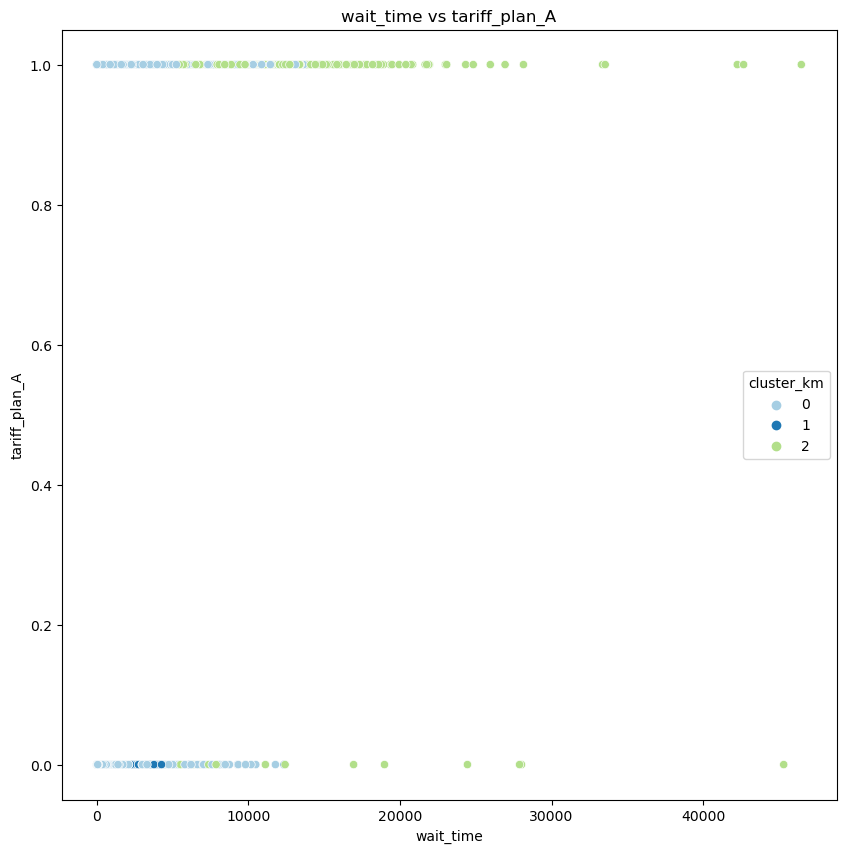

In [117]:
#Relación clusters entre tiempo de espera y fecha cliente tipo A
show_clusters_on_plot(ml_df, 'wait_time', 'tariff_plan_A', 'cluster_km')

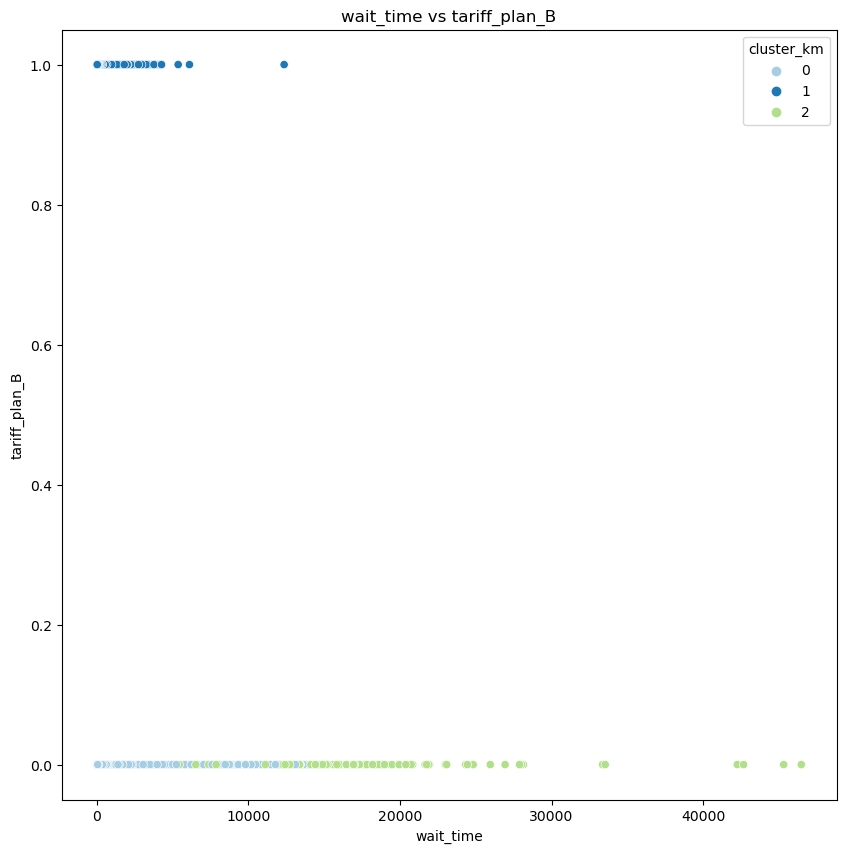

In [118]:
#Relación clusters entre tiempo de espera y fecha cliente tipo B
show_clusters_on_plot(ml_df, 'wait_time', 'tariff_plan_B', 'cluster_km')

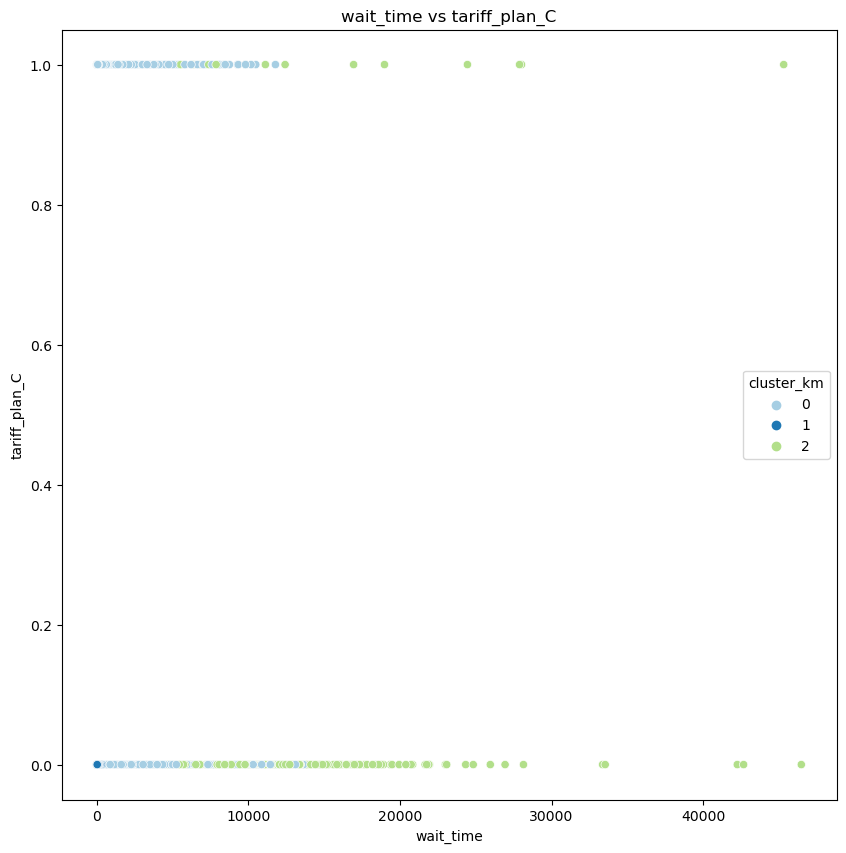

In [119]:
#Relación clusters entre tiempo de espera y fecha cliente tipo C
show_clusters_on_plot(ml_df, 'wait_time', 'tariff_plan_C', 'cluster_km')

Observamos que el mayor tiempo de espera pertenece al plan A, mientras que el plan B tiene el menor y el plan C tiene los tiempos de espera más variados

## Conclusiones 


En este proyecto observamos diferentes variables de la empresa de telefonía en donde se buscaron patrones que permitieran al equipo de supervisión indentificar más fácilmente operadores indieficaces. 
Para esto se identificaron dos diretrices donde la primera fue hallar operadores con varias llamadas perdidas o bien operadores con tiempos de espera muy largos. 
Primero se realizó un análsis exploratorio donde de graficaron distintas variables para conocer la relación entre las mismas. En esta exploración inicial hallamos que no existía una relación o patrón directo aparente para dictar la ineficiencia de los operadores, siendo que una de las hipótesis era la fecha se observó que esta no influia, sino que las métricas de ineficiencia eran más altas entre los primeros días de la semana por la carga de trabajo. 
Más adelantes se obtuvieron gráficas para clasificar a los clientes pues se tenía la hipótesis que los tipos de clientes influían en el número de llamadas perdidas o tiempos de espera largos. 
Sin embargo vimos que no había una relaación evidente entre la categoría de los clientes o el número de llamadas perdidas, sin embargo para confirmar esta distribución se generó un análisis de clusters para identificar mejor las distribuciones. 
En las gráficas generales se observaron varios valores atípicos que si bien se filtraron para mejorar la visualización de las gráficas, se mantuvieron para posteriores análisis.
Para el análsis estadístico se calculó el valor sigma es decir, la desviación estándar y la media para obtener los valores recomendados, y  de esta manera generar pruebas estadísticas dando como resultado que las diferencias entre la duración de llamadas entre los usuarios eficaces e ineficaces si era significativa.
Finalmente se obtuvieron los clusters para identificar las caracteristicas de operadores ineficaces, obteniendo como resultados 3 clusters obteniendo que las llamadas con mayor duración pertenecían los operadores más ineficaces, es decir con mayor tiempo de espera y número de llamadas perdidas


## Recomendaciones

Para este caso, observamos que los operadores más ineficaces son aquellos con mayor carga de trabajo como se mostró en análsis exploratorio y de clustres, por lo que se recomienda generar estrategias para lograr reaprtir de mejor manera la carga de trabajo de los trabajadores. 
Igualmente se recomiendan futuros análisis para revisar el perfil de operadores, como por ejemplo el tiempo que llevan dentro de la empresa. 
Así mismo se recomeinda mejorar los procesos de capcitación de los colaboradores para una mejora continua, que como vimos en la introdcción del proyecto, genera menores costos que simplemente generar una rotación del personal ineficiente. 
Igualmente se recomienda complementar este análsisis con equipos especilizados en ciencia de datos que permitan mejorar e implementar modelos de predicción de llamadas perdidas que permitan segmentar mejor los clientes  o tipos de llamadas dando otros parámetros para generar mejoras o incluso la probabilidad de un operador de volverse ineficaz en función de las llamadas y los clientes que atiende para mejorar las estrategias de capacitación de los mismos. 
Pues como menciona el artículo de Zendesk(2023), alrededor del 59% de los call center no reciben una capacitación adecuada. 
Para esto el artículo recomeinda los siguientes pasos a seguir: 

1. Flujograma de atención al cliente
2. Inteligencia emocional
3. Estrategias de comunicación no violenta
4. Protocolos de etiqueta telefónica
5. Técnicas de persuasión
6. Habilidades de negociación
7. Uso de herramientas y sistemas


## Referencias 

### Referencias teóricas 

Acuña, A. P. (2012). La gestión de los stakeholders: análisis de los diferentes modelos. Encuentro Regional Zona Sur Adenag. Trelew 19 y 20 de abril de 2012. Disponible en: http://repositoriodigital.uns.edu.ar/handle/123456789/4441

Mendoza, R. (2003). ¿Sabe cuánto le cuesta la rotación de personal? Revista Escuela de Administración de Negocios, 48, 104-109. https://journal.universidadean.edu.co/index.php/Revista/article/view/255

Zendesk (2023). Capacitación en atención al cliente [GUÍA DE 9 PASOS]. Disponible en: https://www.zendesk.com.mx/blog/capacitacion-en-atencion-al-cliente/

#### Uso de las referencias 
Se utilizó el primer artículo como referencia para hallar un modelo óptimo de selcción de stakeholders en el proyecto que permitiera mejorar la comprensión del problema al identificar de mejor forma a las partes interesadas, el segundo artículos se usó para obtener información adicional a la justificación del proyecto, ya que la ineficiencia de los operadores podría incurrir en un exceso de rotación de personal lo cual afecta negativamente a una organización. 
Finalmente se citó el tercer artícuilo para lograr brindar mejores recomendaciones a los stakeholders basándose en los hallazgos de análsis, siendo considerada la capacitación un punto clave en el rendimiento de los operadores, esperando estas recomendaciones puedan brindar una pauta para obtener mejores resultados en el futuro.

### Referencias de código 

#### Librerias de preprocesamiento de datos 

API reference — pandas 2.2.2 documentation. (s.f.). https://pandas.pydata.org/docs/reference/index.html

#### Librerias de visualización

API reference — seaborn 0.13.2 documentation. (s.f.). https://seaborn.pydata.org/api.html

Using Matplotlib — Matplotlib 3.9.2 documentation. (s.f.). https://matplotlib.org/stable/users/index.html

#### Librerias para Machine Learning
API reference. (s.f.). Scikit-learn. https://scikit-learn.org/stable/api/index.html

SciPY API — SciPY V1.14.0 Manual. (s.f.). https://docs.scipy.org/doc/scipy/reference/index.html#scipy-api



#### Uso de las referencias 
Usamos diferentes librerias en este proyecto, la primer librería fue pandas la cual ayudó en el procesamiento inicial de los datos para detección de valores ausentes y duplicados así como en la lectura, creación, modificación y unión de los diferentes Dataframes utilizado en el proyecto. 
Para las librerías de visualización se utilizó tanto Matplotlib como Seaborn las cuales permitieron visualizar los datos obtenidos en diferentes gráficas según se requería, se optó por la utilización de ambas librerías para agilizar la visualización y optimización del despliegue de gráficos. 
En temas de trabajo de pronóstico y predicciones usamos la documentación y librerias de la API SciPY para obtener información sobre las pruebas estadísticas necesarias para las pruebas de hipótesis así como apoyar en la determinación del número de clusters óptimos en el anáslisis predictivo, también se utilizó la librería Scikit-learn para poder realizar pruebas para elegir un modelo de aprendizaje automático y la agrupación por clusters de las variables dadas por el análsis de negocio.